# Integration Tests 

In [1]:
## Import the Forest-Guided Clustering package
from fgclustering import FgClustering

## Imports for datasets
from palmerpenguins import load_penguins
from sklearn.datasets import load_breast_cancer, load_iris, fetch_california_housing

## Additional imports for use-cases
import pandas as pd

from random_word import RandomWords
from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Binary Classification: Breast Cancer Dataset

In [2]:
data_breast_cancer = load_breast_cancer(as_frame=True)
data_breast_cancer = data_breast_cancer.frame
data_breast_cancer['target'] = data_breast_cancer['target'].map({0: 'malignant', 1: 'benign'})

X_breast_cancer = data_breast_cancer.loc[:, data_breast_cancer.columns != 'target']
y_breast_cancer = data_breast_cancer.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_breast_cancer, y_breast_cancer)
rf_breast_cancer = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_breast_cancer.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9543057996485061


In [3]:
fgc = FgClustering(model=rf_breast_cancer, data=data_breast_cancer, target_column='target')
fgc.run(max_K=4)

Interpreting RandomForestClassifier


 50%|█████     | 1/2 [00:01<00:01,  1.09s/it]

For number of cluster 2 the Jaccard Index is 0.9977762891115787
For number of cluster 2 the score is 0.06613635989234057


100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

For number of cluster 3 the Jaccard Index is 0.8861827734206449
For number of cluster 3 the score is 0.07478999977783318
Optimal number of cluster is: 2


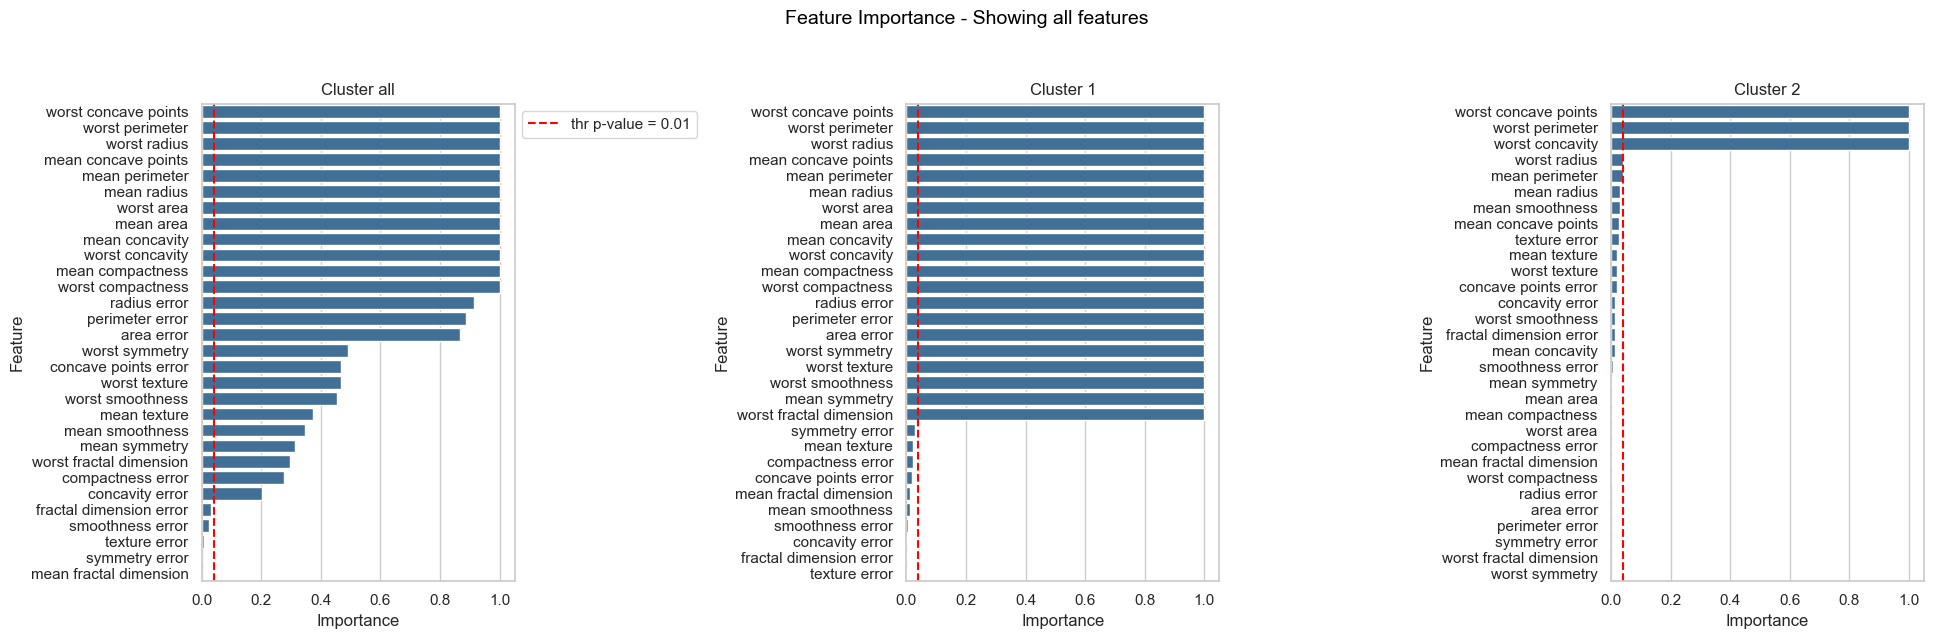

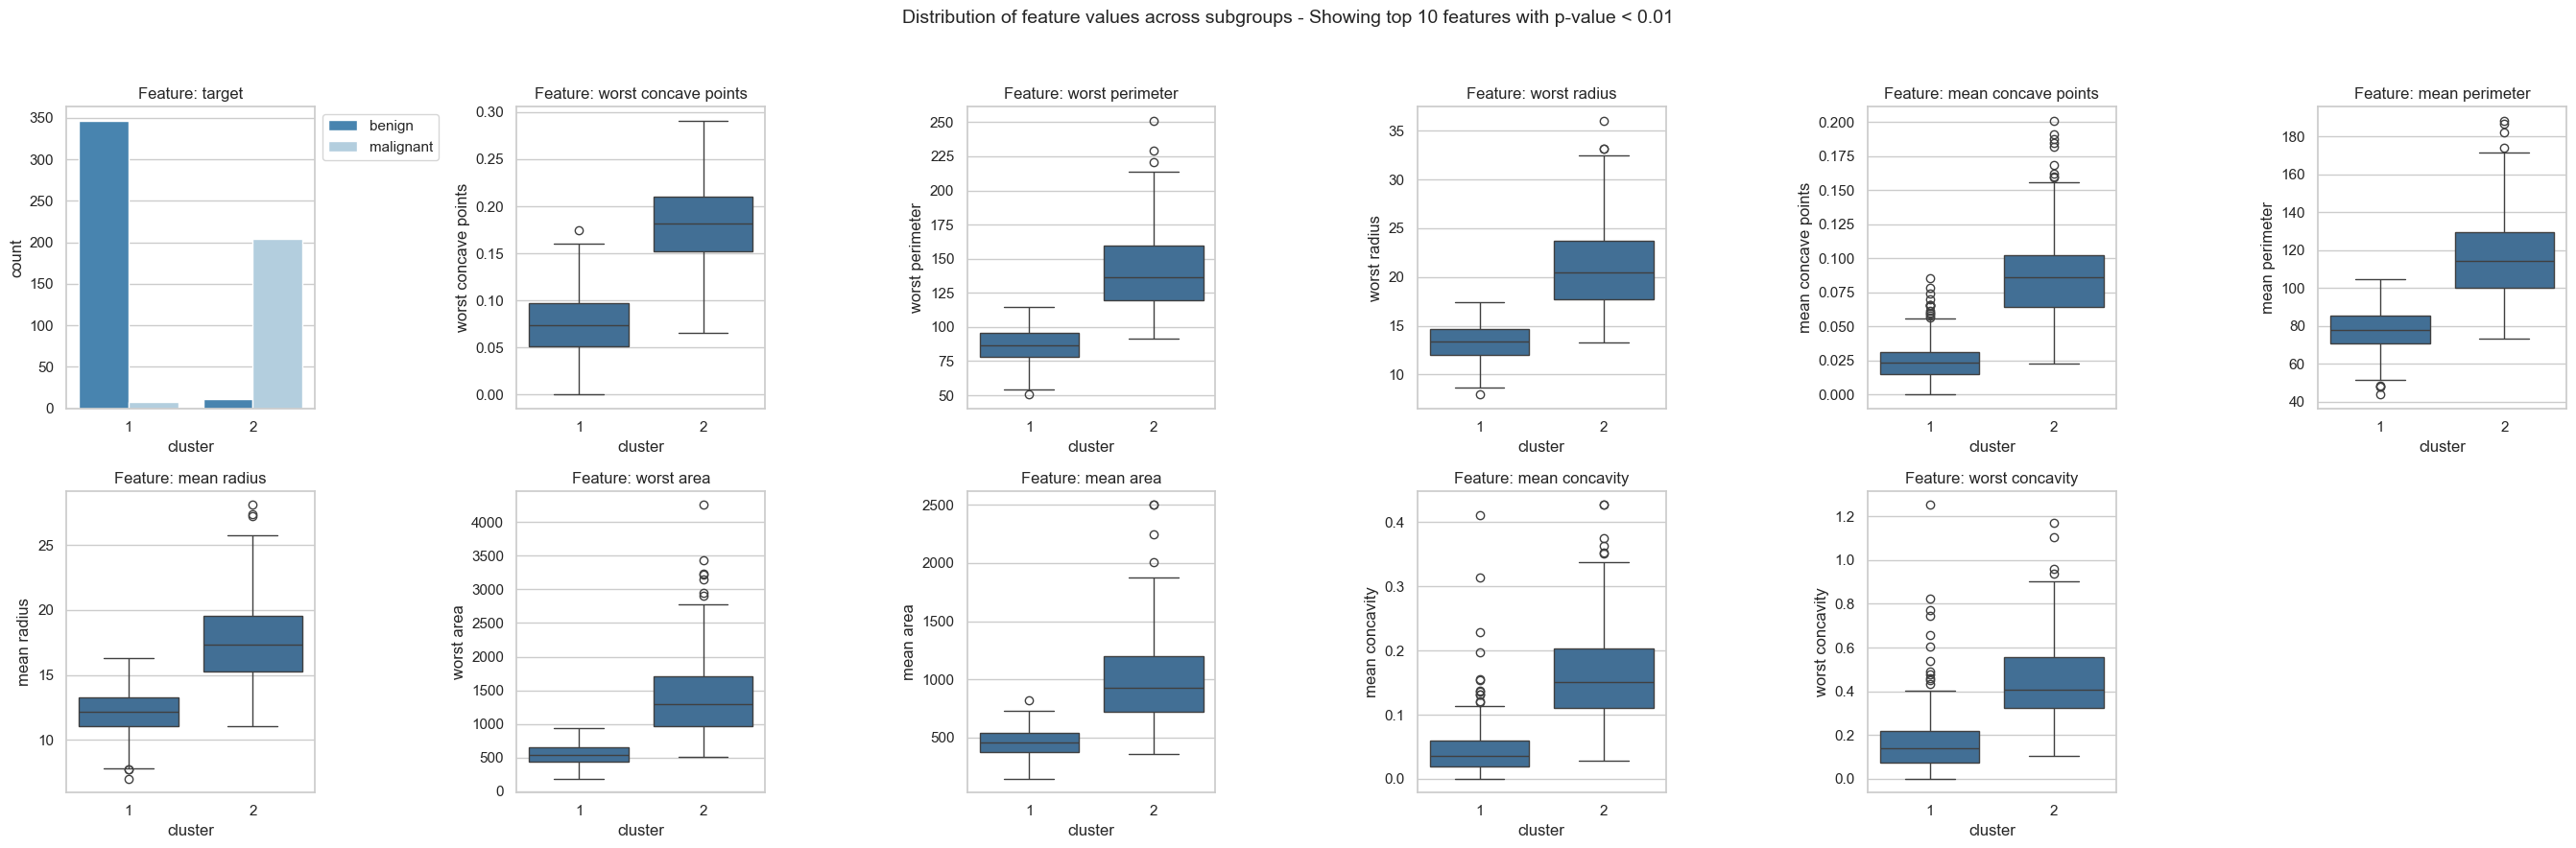

/Users/lisa.barros/Desktop/fg-clustering/fgclustering/plotting.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_heatmap = pd.concat(


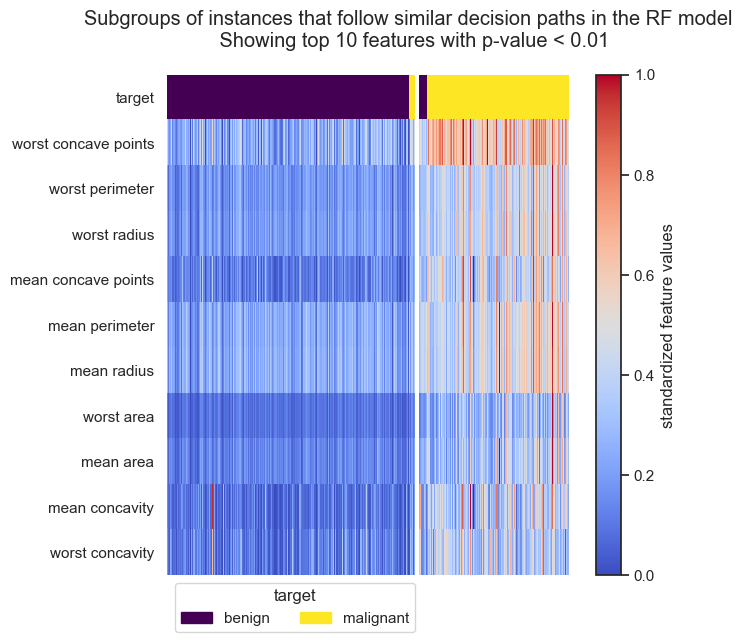

In [4]:
fgc.plot_feature_importance(thr_pvalue=0.01)
fgc.plot_decision_paths(thr_pvalue=0.01, top_n=10, num_cols=6)

## Multiclass Classification: Iris Dataset

In [5]:
data_iris = load_iris(as_frame=True)
data_iris = data_iris.frame
data_iris['target'] = data_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

X_iris = data_iris.loc[:, data_iris.columns != 'target']
y_iris = data_iris.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_iris, y_iris)
rf_iris = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_iris.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9533333333333334


In [6]:
fgc = FgClustering(model=rf_iris, data=data_iris, target_column='target')
fgc.run()

Interpreting RandomForestClassifier


  0%|          | 0/6 [00:00<?, ?it/s]

For number of cluster 2 the Jaccard Index is 0.5921149836555343
Clustering is instable, no score computed!


 33%|███▎      | 2/6 [00:00<00:00,  9.35it/s]

For number of cluster 3 the Jaccard Index is 1.0
For number of cluster 3 the score is 0.0630091172123111


 50%|█████     | 3/6 [00:00<00:00,  7.31it/s]

For number of cluster 4 the Jaccard Index is 0.4200836940836941
Clustering is instable, no score computed!


 67%|██████▋   | 4/6 [00:00<00:00,  5.71it/s]

For number of cluster 5 the Jaccard Index is 0.40768160352719185
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:00<00:00,  4.52it/s]

For number of cluster 6 the Jaccard Index is 0.5419166666666668
Clustering is instable, no score computed!


100%|██████████| 6/6 [00:01<00:00,  4.56it/s]

For number of cluster 7 the Jaccard Index is 0.5421904761904761
Clustering is instable, no score computed!
Optimal number of cluster is: 3


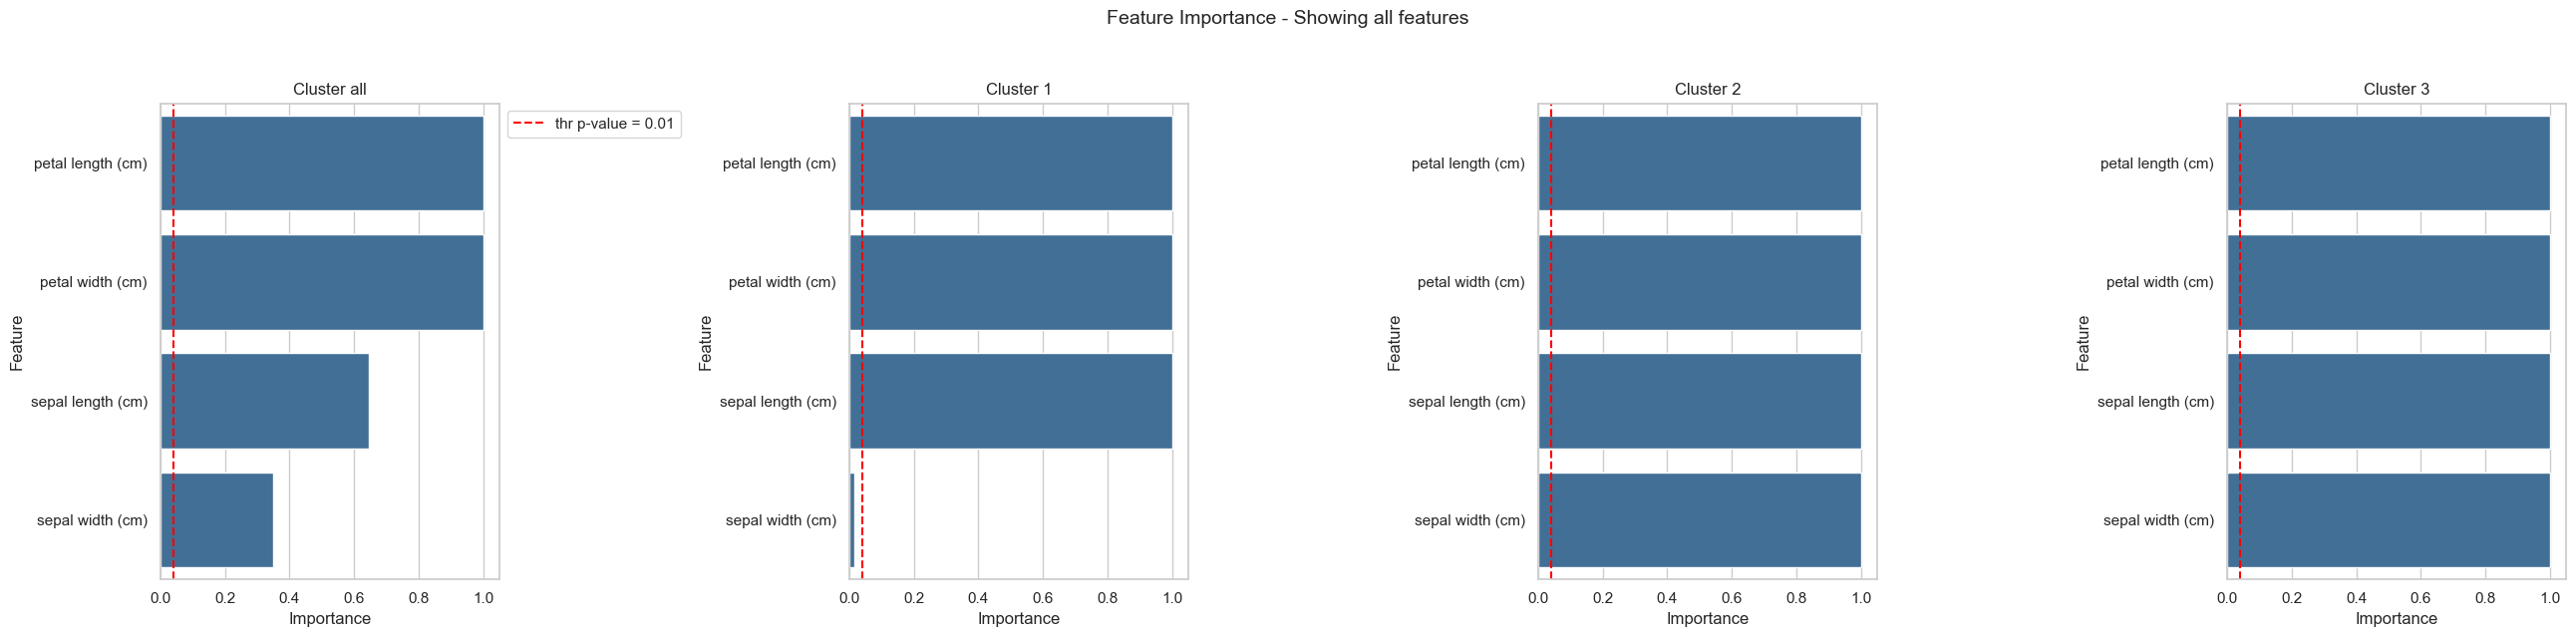

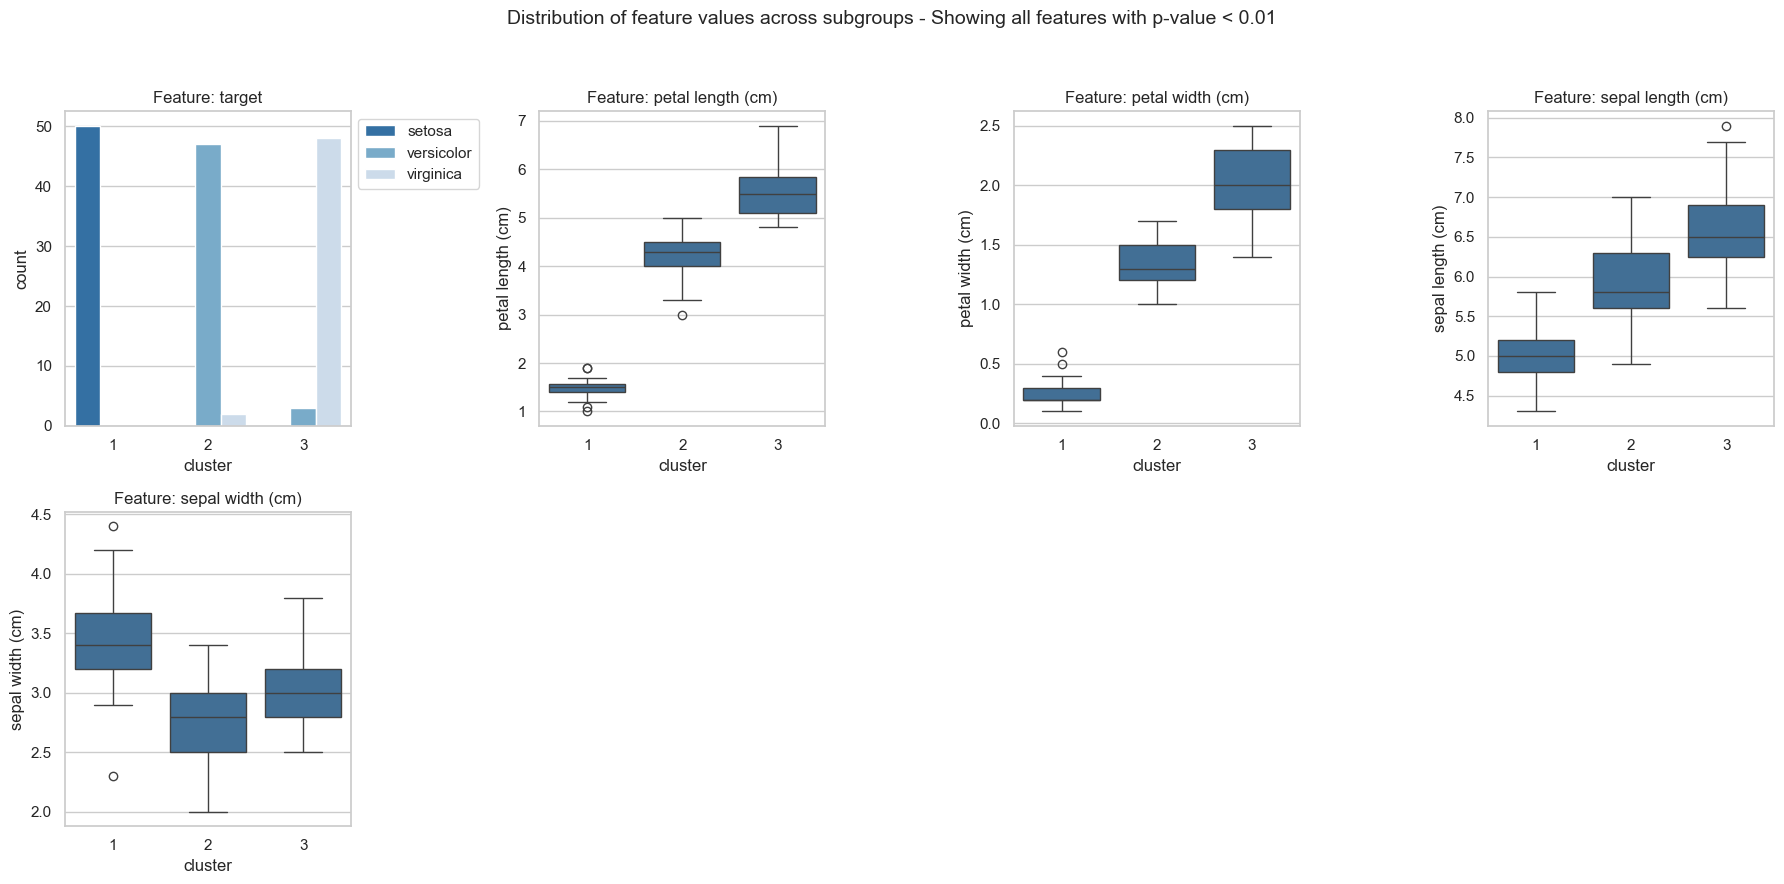

/Users/lisa.barros/Desktop/fg-clustering/fgclustering/plotting.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_heatmap = pd.concat(


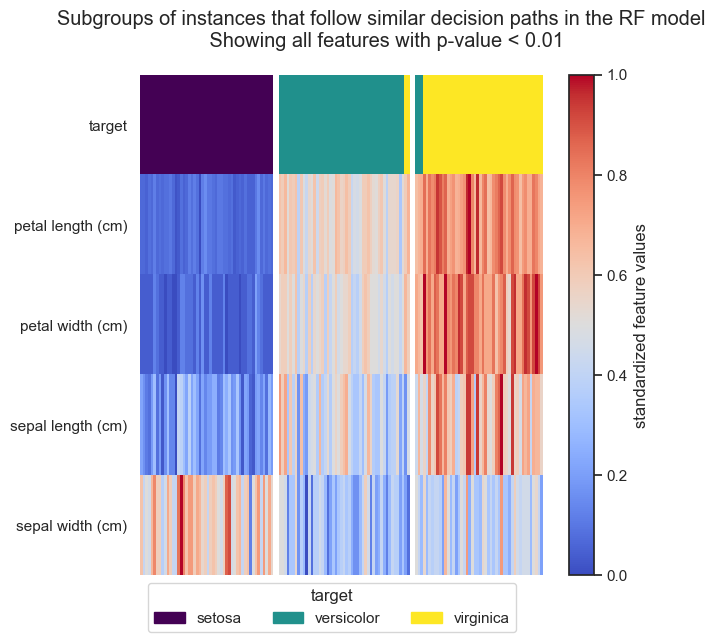

In [7]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4)

## Multiclass Classification: Penguins Dataset

In [8]:
data_penguins = load_penguins()
data_penguins.rename(columns={'species':'target'}, inplace=True)

# Remove the instances with missing values and check how many we are left with
print(f"Before omiting the missing values the dataset has {data_penguins.shape[0]} instances")
data_penguins.dropna(inplace=True)
print(f"After omiting the missing values the dataset has {data_penguins.shape[0]} instances")

# preprocess categorical features such that they can be used for the RF model
data_penguins_encoded = pd.get_dummies(data_penguins, columns=['island', 'sex'], prefix=['island', 'sex'], drop_first=True)

X_penguins = data_penguins_encoded.loc[:, data_penguins_encoded.columns != 'target']
y_penguins = data_penguins_encoded.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_penguins, y_penguins)
rf_penguins = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_penguins.oob_score_)

Before omiting the missing values the dataset has 344 instances
After omiting the missing values the dataset has 333 instances
Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.984984984984985


In [9]:
fgc = FgClustering(model=rf_penguins, data=data_penguins_encoded, target_column='target')
fgc.run()

Interpreting RandomForestClassifier


 17%|█▋        | 1/6 [00:00<00:01,  3.06it/s]

For number of cluster 2 the Jaccard Index is 0.9160289493578838
For number of cluster 2 the score is 0.32933697175607646


 33%|███▎      | 2/6 [00:00<00:01,  2.09it/s]

For number of cluster 3 the Jaccard Index is 0.9952883877989059
For number of cluster 3 the score is 0.018666445142142996


 50%|█████     | 3/6 [00:01<00:01,  1.73it/s]

For number of cluster 4 the Jaccard Index is 0.9718654376806184
For number of cluster 4 the score is 0.07721157852502875


 67%|██████▋   | 4/6 [00:02<00:01,  1.27it/s]

For number of cluster 5 the Jaccard Index is 0.542860857827226
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:04<00:00,  1.00it/s]

For number of cluster 6 the Jaccard Index is 0.8737253192050606
For number of cluster 6 the score is 0.02112436148148152


100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

For number of cluster 7 the Jaccard Index is 0.4526426851667004
Clustering is instable, no score computed!
Optimal number of cluster is: 3


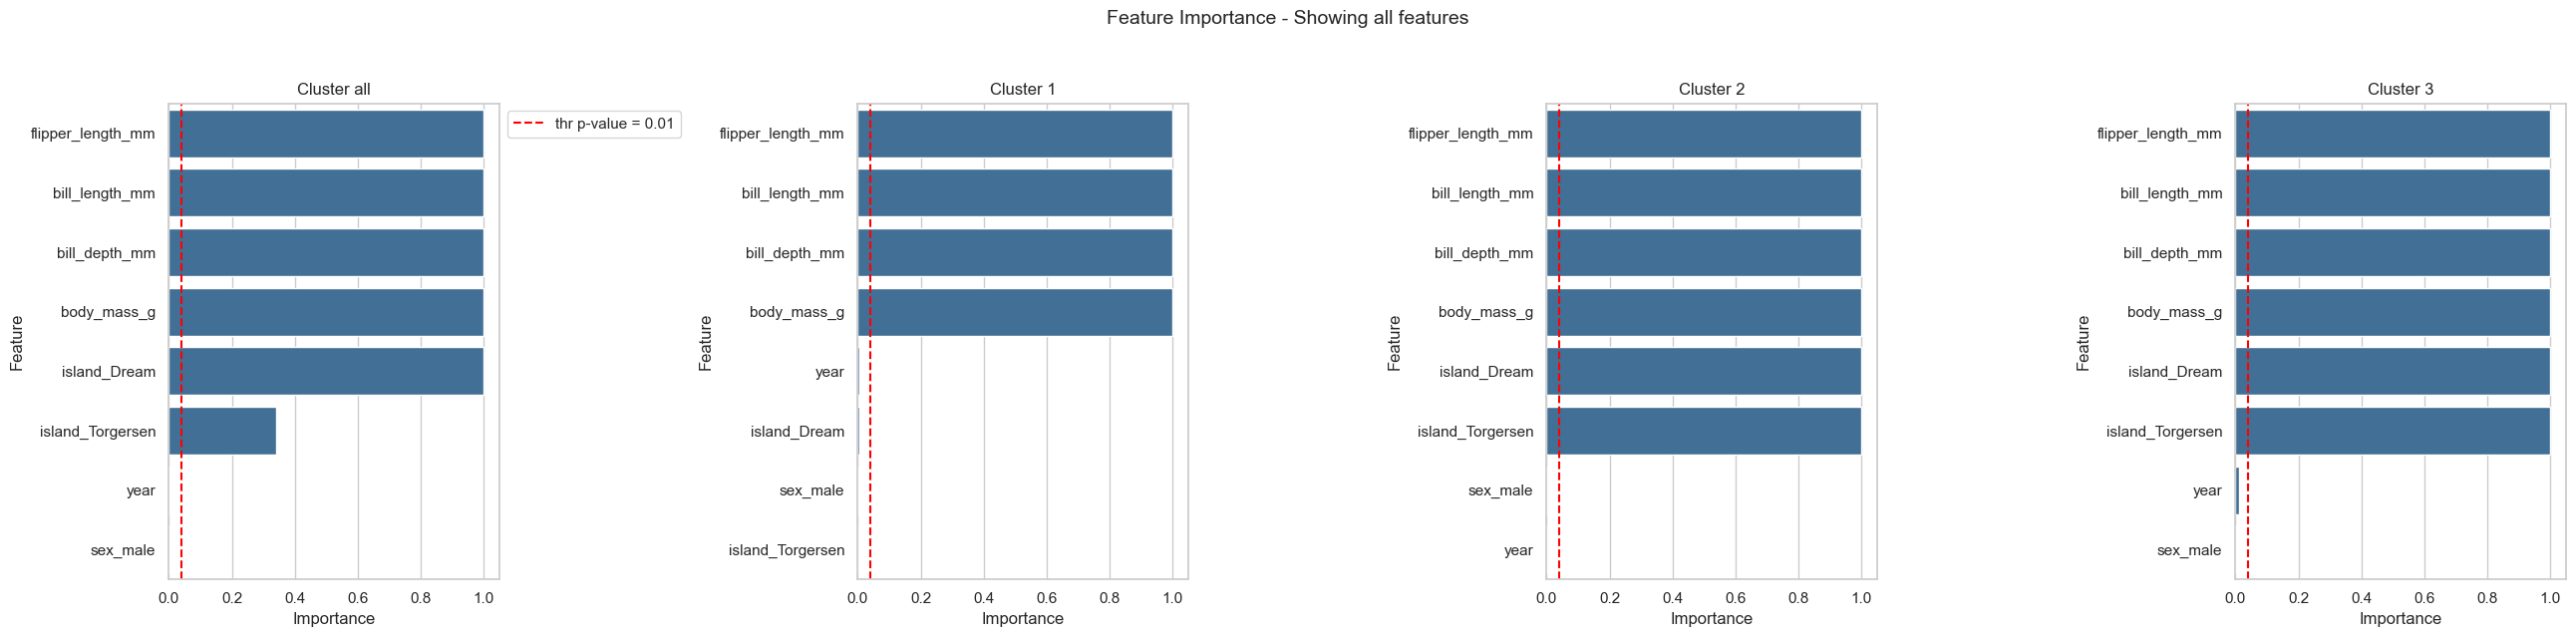

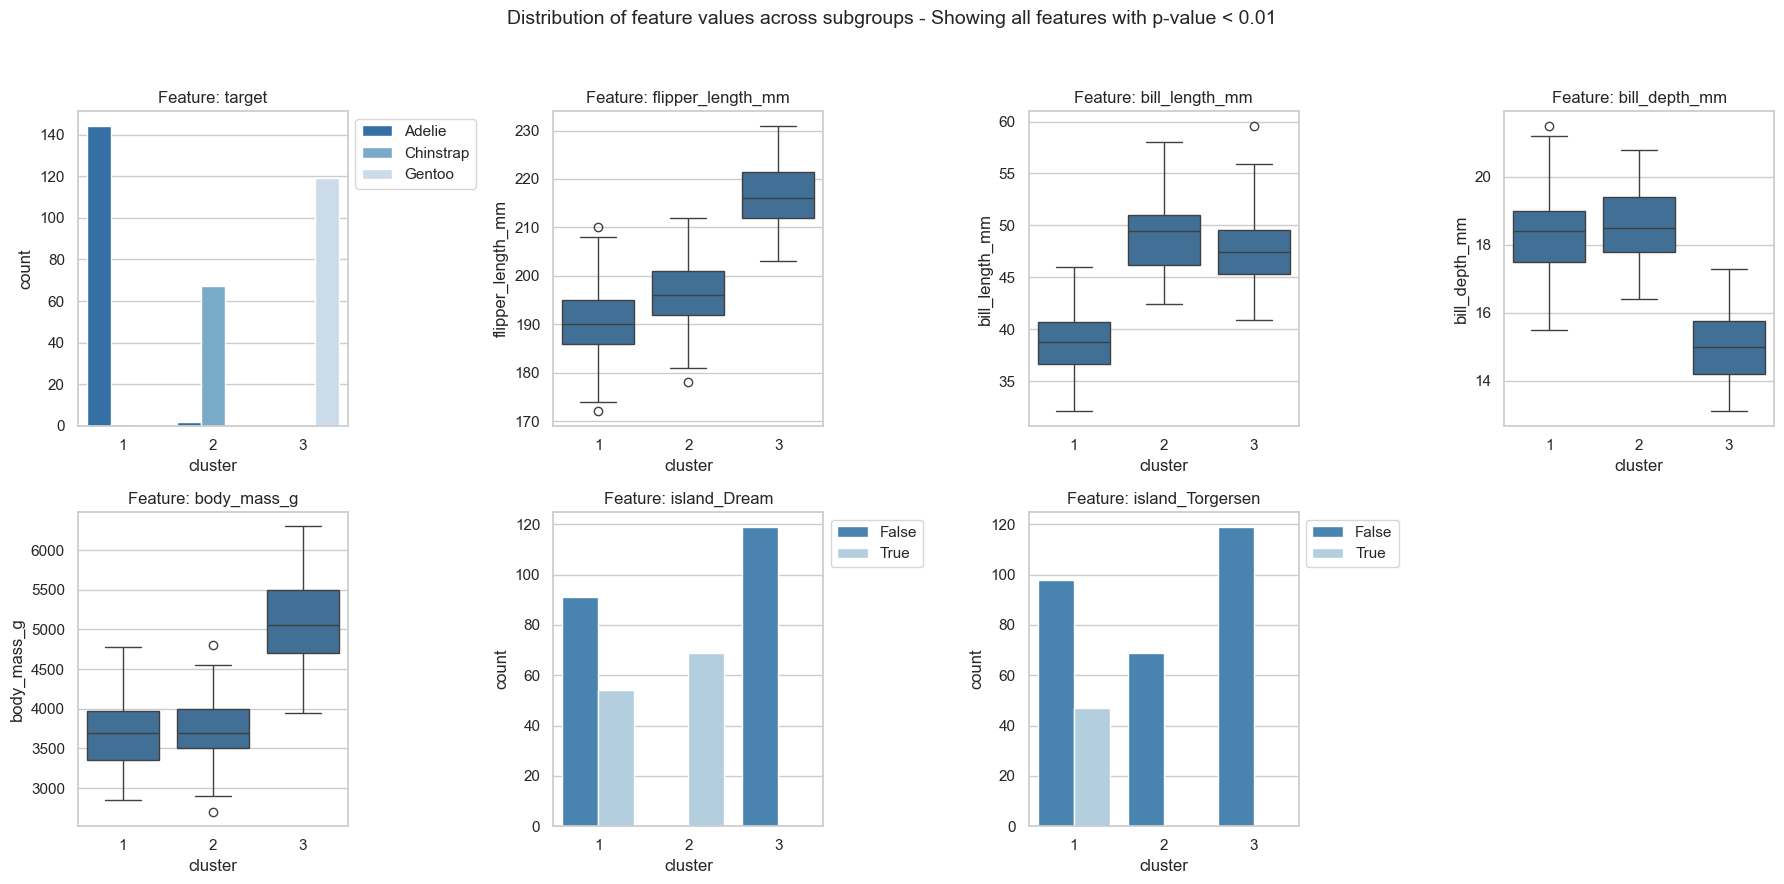

/Users/lisa.barros/Desktop/fg-clustering/fgclustering/plotting.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_heatmap = pd.concat(


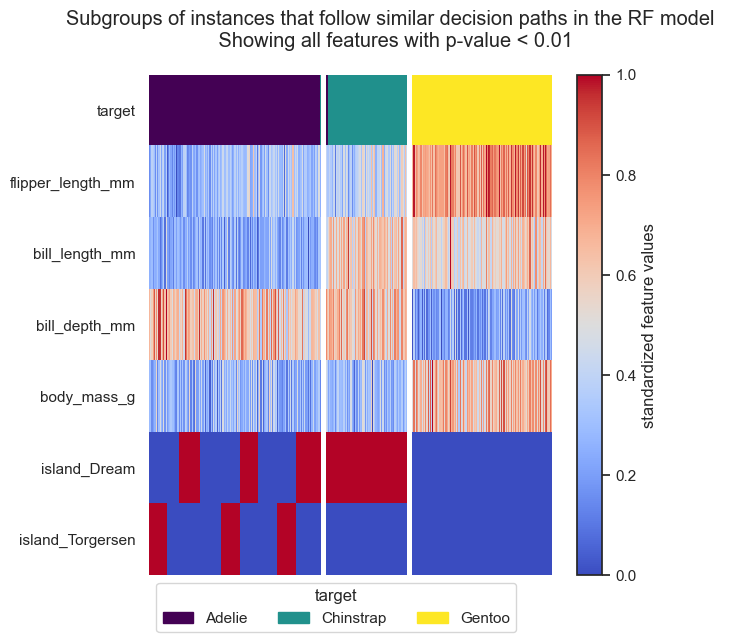

In [10]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4)

In [11]:
data_penguins_encoded['island'] = data_penguins['island'].astype('category')
data_penguins_encoded['sex'] = data_penguins['sex'].astype('category')

X_train_original = data_penguins_encoded.drop(columns=["island_Torgersen", "island_Dream", "sex_male"])

fgc.calculate_statistics(data=X_train_original, target_column="target")

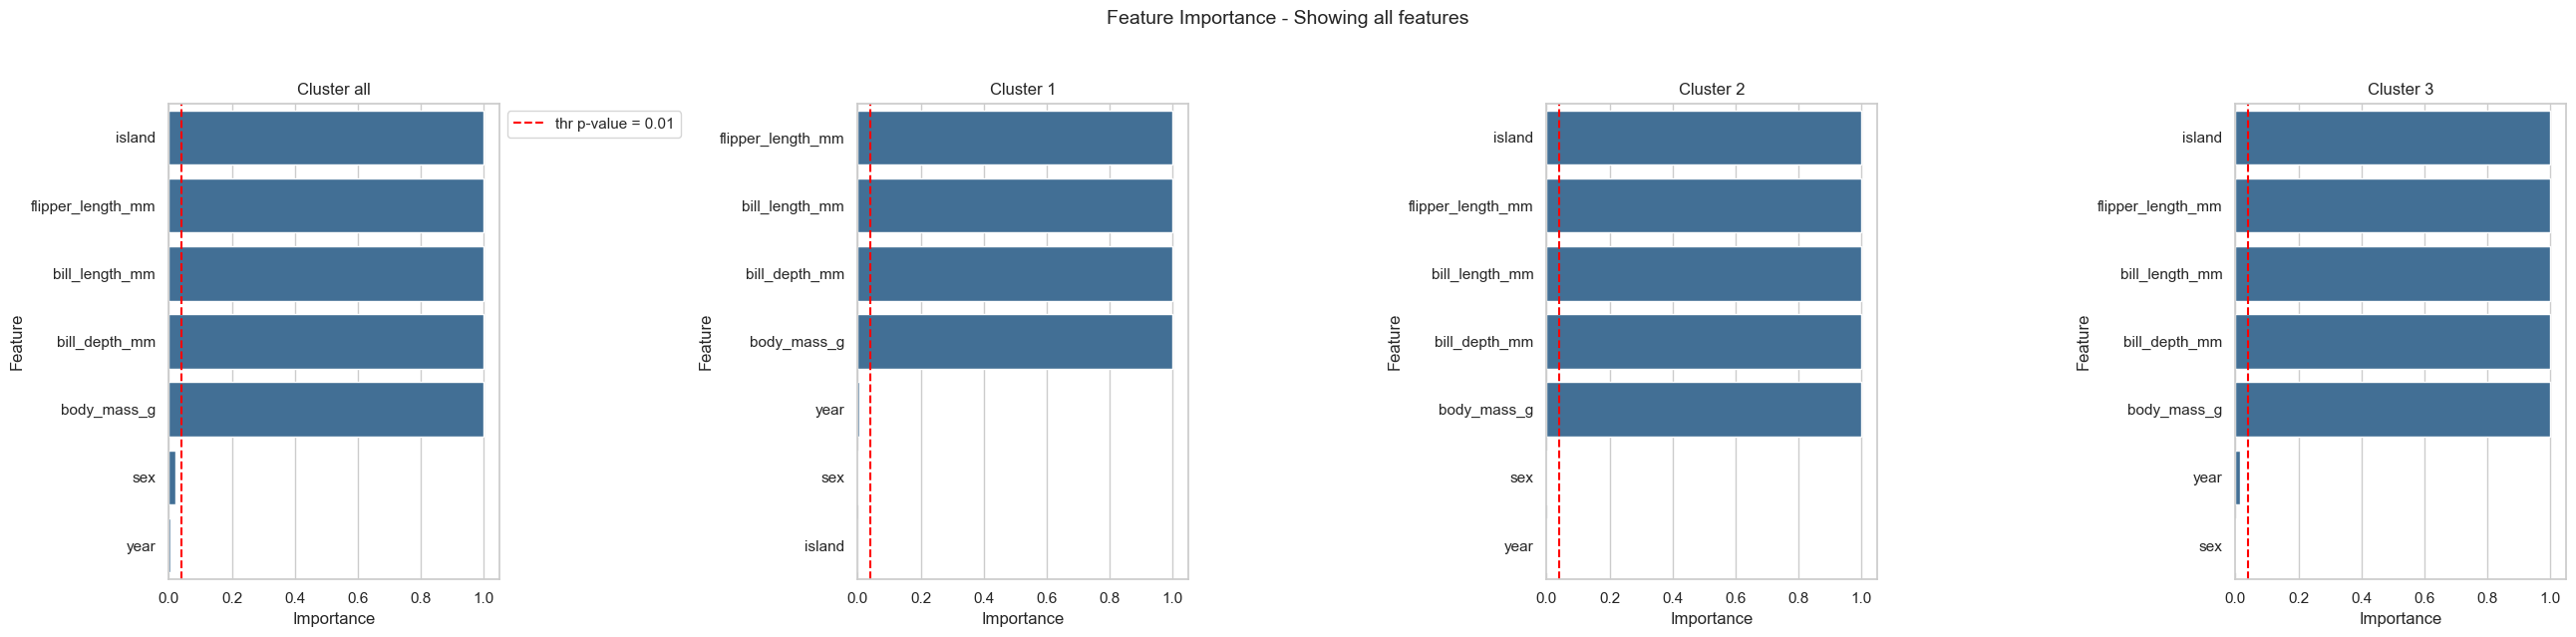

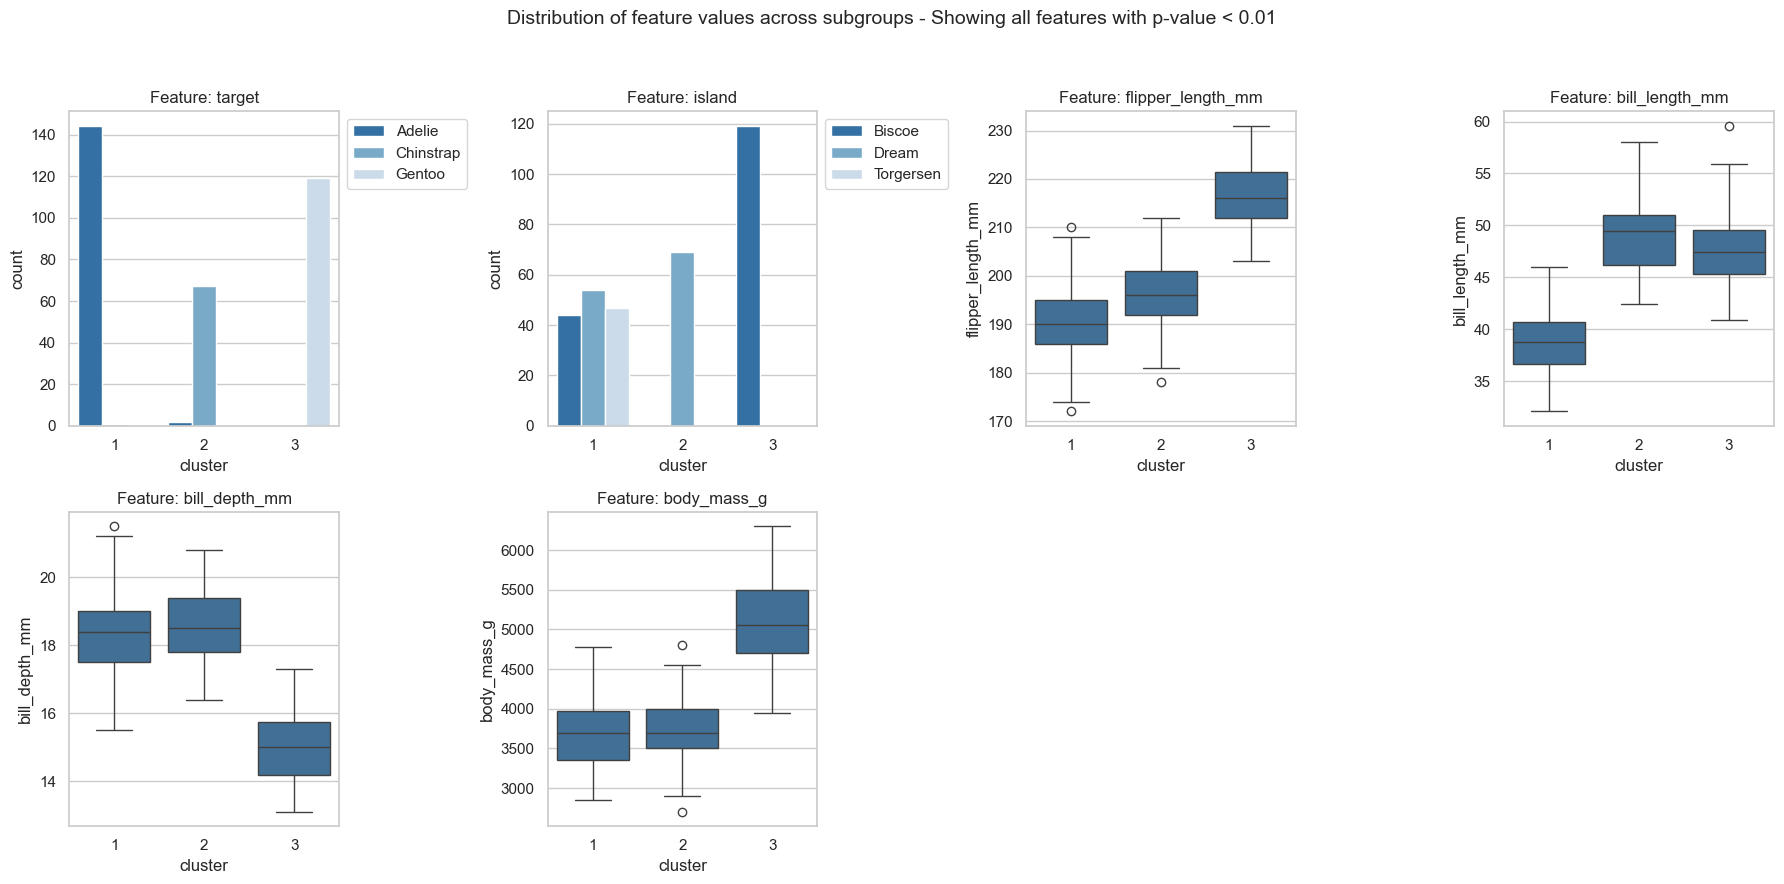

/Users/lisa.barros/Desktop/fg-clustering/fgclustering/plotting.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_heatmap = pd.concat(


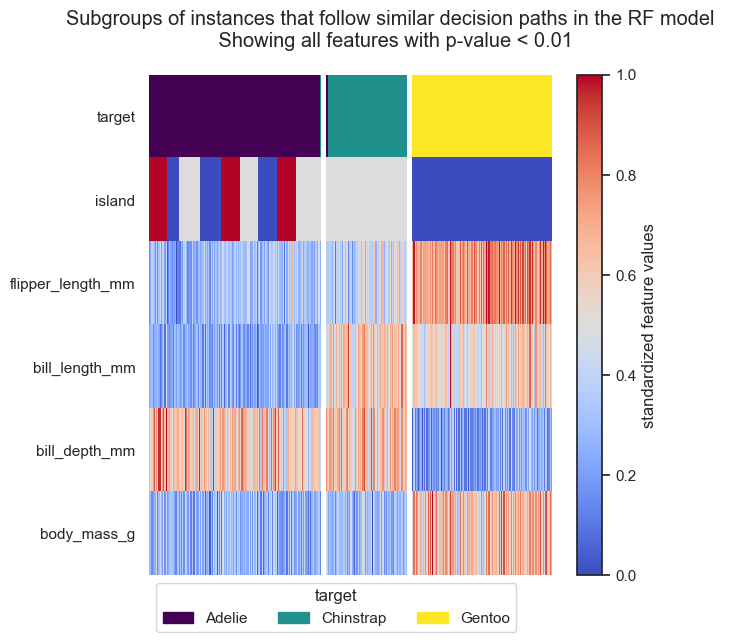

In [12]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4)

## Regression: California Housing Dataset

In [13]:
data_housing = fetch_california_housing(as_frame=True)
data_housing = data_housing.frame
data_housing.rename(columns={'MedHouseVal':'target'}, inplace=True)

# for sake of runtime we only use the first 3000 samples
data_housing = data_housing[:3000]
data_housing.head()

X_housing = data_housing.loc[:, data_housing.columns != 'target']
y_housing = data_housing.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestRegressor(n_estimators=100, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_housing, y_housing)
rf_housing = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB R^2 of prediction model:')
print(rf_housing.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'log2'}
OOB R^2 of prediction model:
0.8143895694575555


In [14]:
fgc = FgClustering(model=rf_housing, data=data_housing, target_column='target')
fgc.run(method_clustering='pam', init_clustering='random', n_jobs=6)

Interpreting RandomForestRegressor


 17%|█▋        | 1/6 [00:13<01:08, 13.76s/it]

For number of cluster 2 the Jaccard Index is 0.8590141913899458
For number of cluster 2 the score is 2647.0841058748933


 33%|███▎      | 2/6 [00:29<01:00, 15.18s/it]

For number of cluster 3 the Jaccard Index is 0.826440664841764
For number of cluster 3 the score is 2397.9829201428356


 50%|█████     | 3/6 [00:56<01:01, 20.60s/it]

For number of cluster 4 the Jaccard Index is 0.53110838042077
Clustering is instable, no score computed!


 67%|██████▋   | 4/6 [01:34<00:54, 27.38s/it]

For number of cluster 5 the Jaccard Index is 0.48308819996471286
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [02:22<00:34, 34.62s/it]

For number of cluster 6 the Jaccard Index is 0.8016351103174972
For number of cluster 6 the score is 1024.1875551292037


100%|██████████| 6/6 [03:31<00:00, 35.31s/it]

For number of cluster 7 the Jaccard Index is 0.4989669446533934
Clustering is instable, no score computed!
Optimal number of cluster is: 6


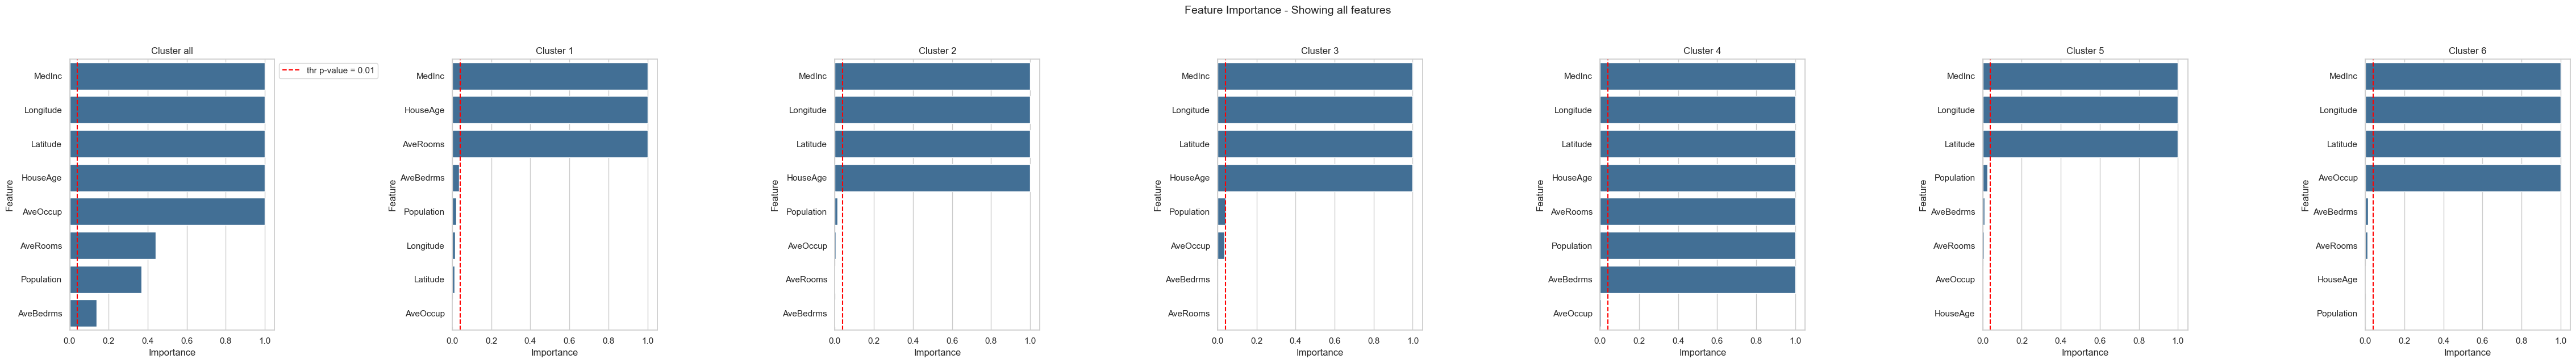

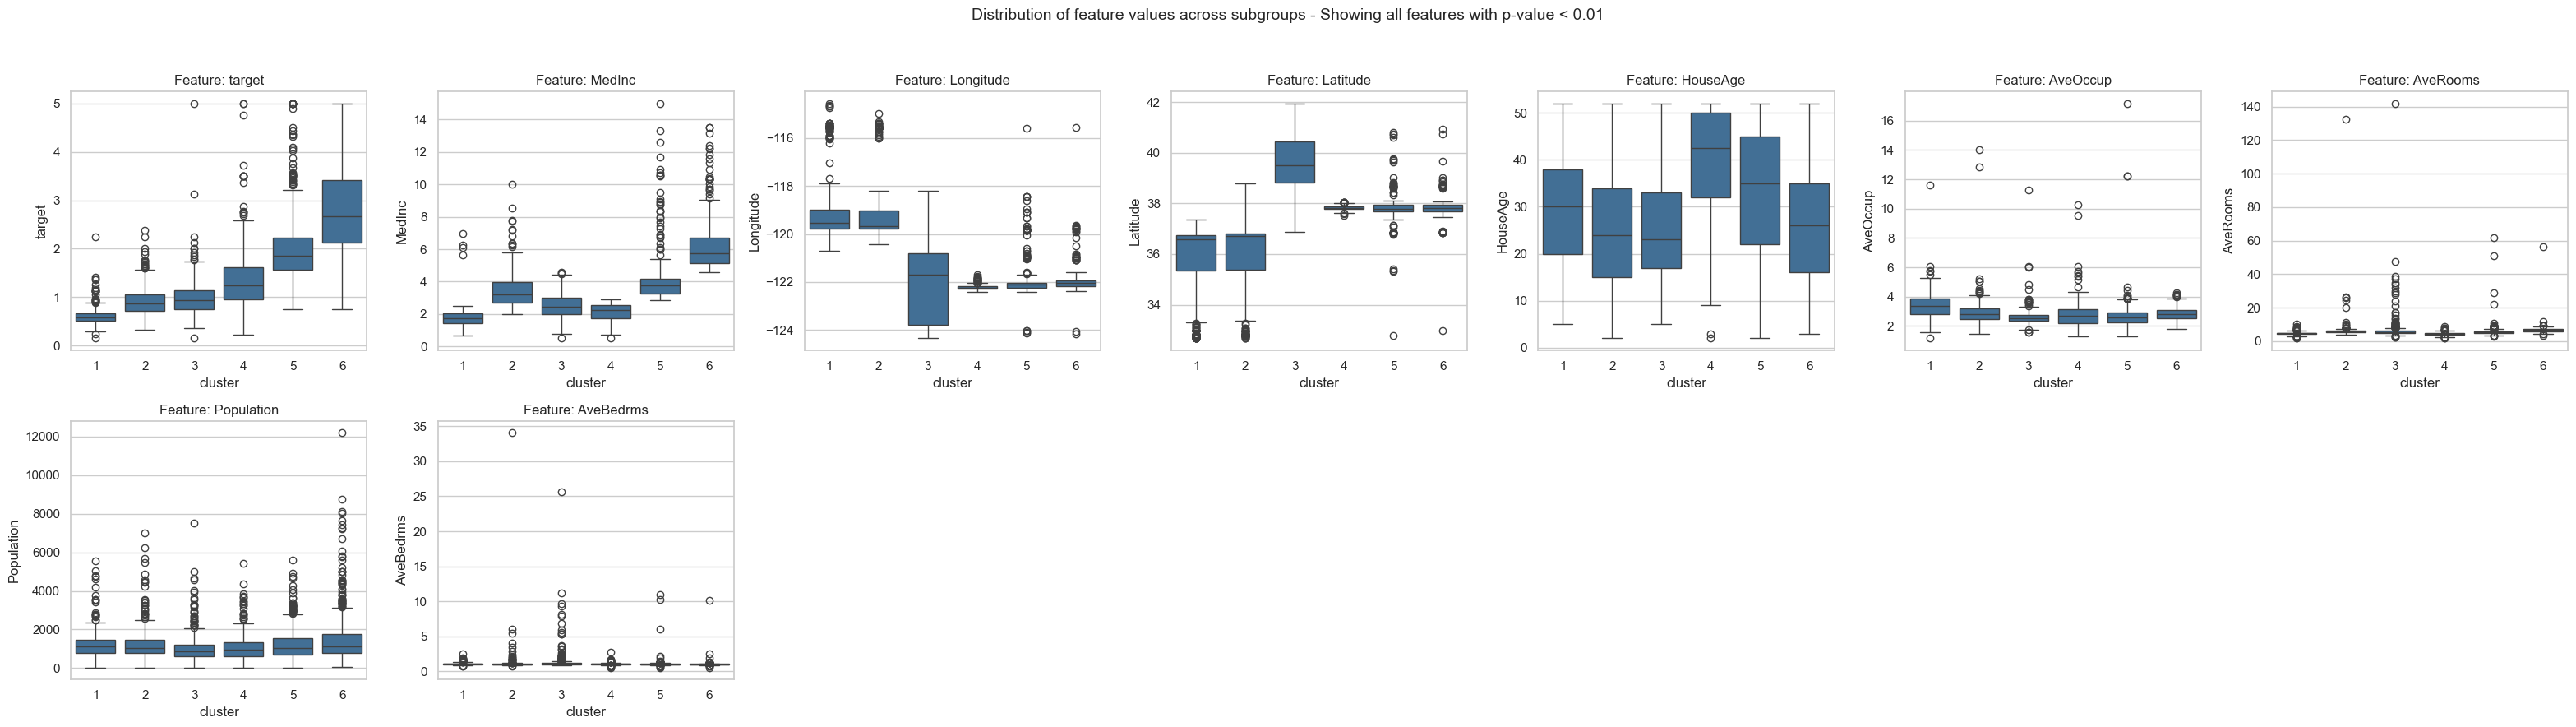

/Users/lisa.barros/Desktop/fg-clustering/fgclustering/plotting.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_heatmap = pd.concat(


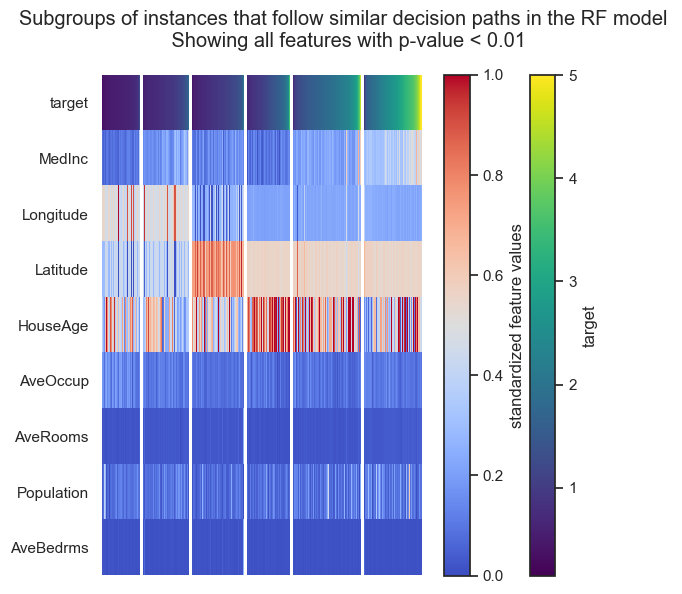

In [15]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=7)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=7)

In [16]:
fgc_fast = FgClustering(model=rf_housing, data=data_housing, target_column='target')
fgc_fast.run(method_clustering='alternate', init_clustering='random', n_jobs=6)

Interpreting RandomForestRegressor


 17%|█▋        | 1/6 [00:04<00:22,  4.56s/it]

For number of cluster 2 the Jaccard Index is 0.91732057767482
For number of cluster 2 the score is 1909.6995878481864


 33%|███▎      | 2/6 [00:08<00:16,  4.20s/it]

For number of cluster 3 the Jaccard Index is 0.6058790802185501
For number of cluster 3 the score is 1997.8183905229025


 50%|█████     | 3/6 [00:12<00:12,  4.28s/it]

For number of cluster 4 the Jaccard Index is 0.3870537652647537
Clustering is instable, no score computed!


 67%|██████▋   | 4/6 [00:17<00:09,  4.59s/it]

For number of cluster 5 the Jaccard Index is 0.40001827387086253
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:22<00:04,  4.55s/it]

For number of cluster 6 the Jaccard Index is 0.4696734403192828
Clustering is instable, no score computed!


100%|██████████| 6/6 [00:27<00:00,  4.59s/it]

For number of cluster 7 the Jaccard Index is 0.40205920011704743
Clustering is instable, no score computed!
Optimal number of cluster is: 2


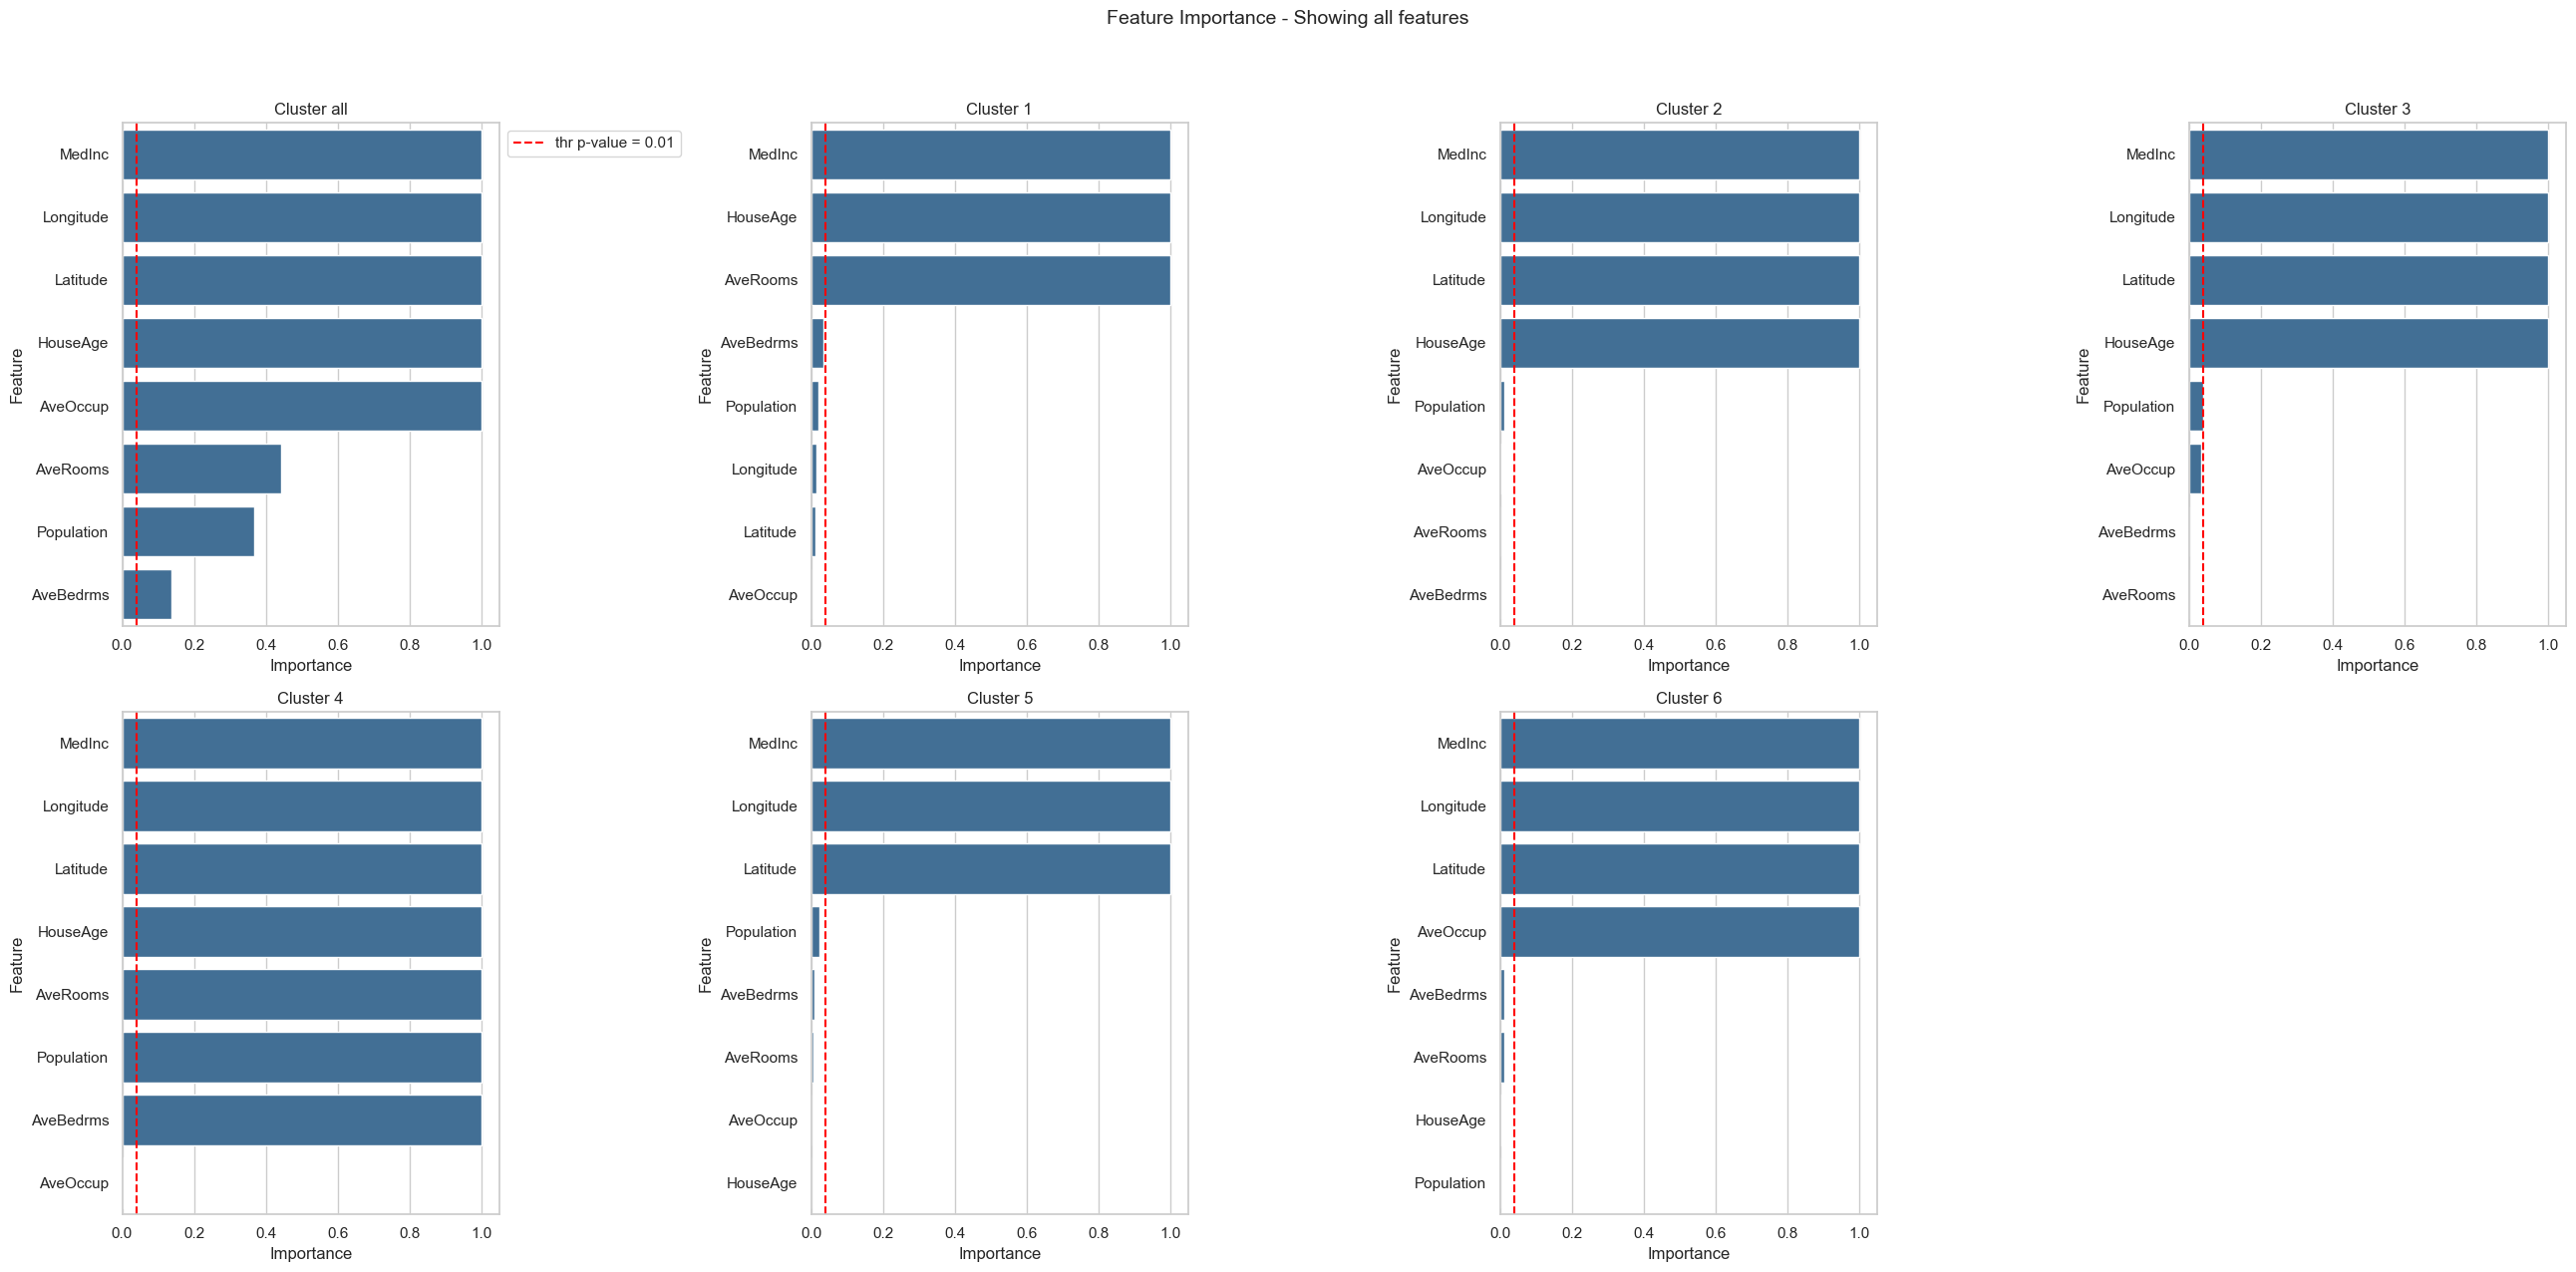

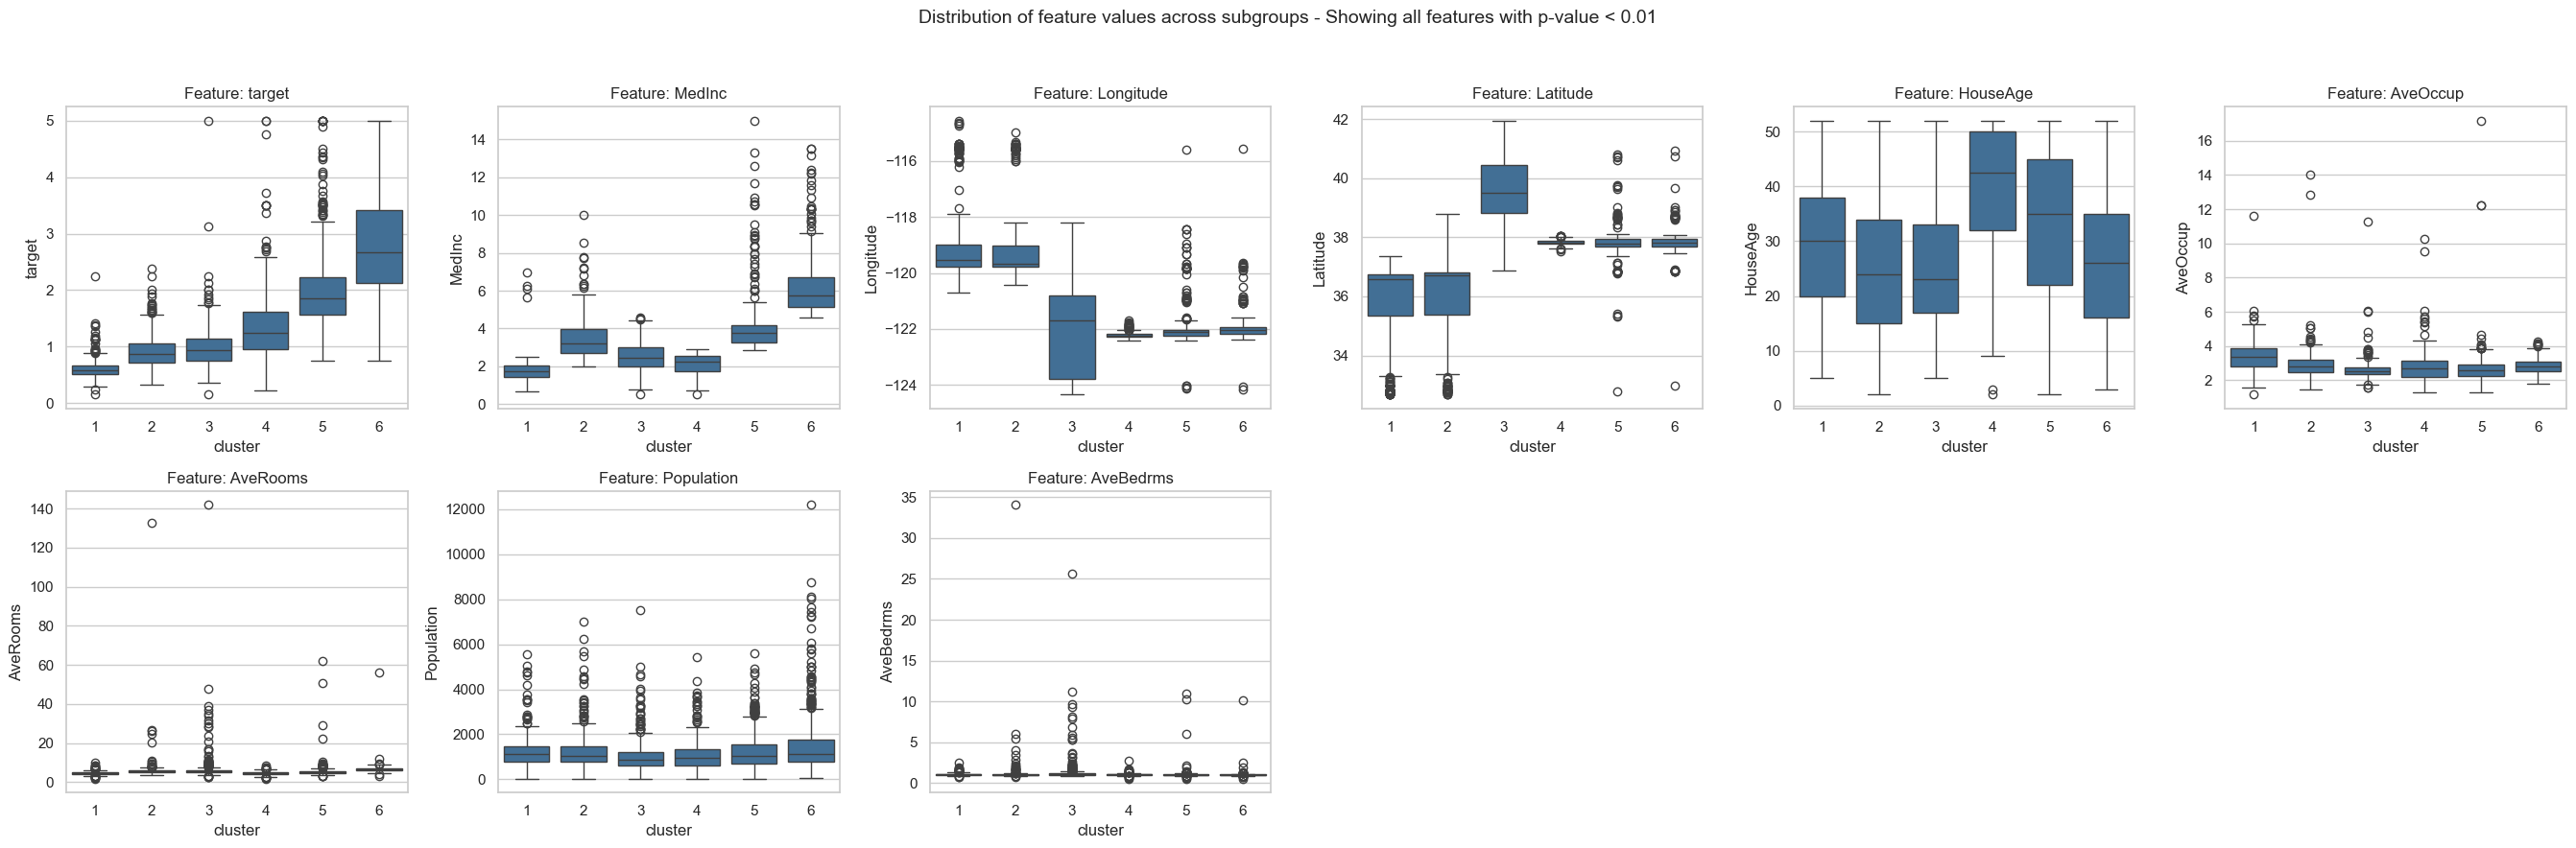

/Users/lisa.barros/Desktop/fg-clustering/fgclustering/plotting.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_heatmap = pd.concat(


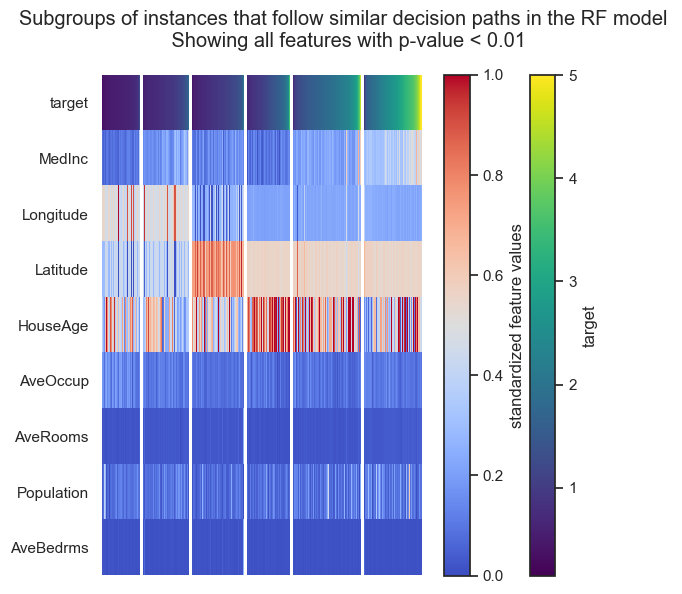

In [17]:
fgc.plot_feature_importance(thr_pvalue=0.01)
fgc.plot_decision_paths(thr_pvalue=0.01)

## Artificial Datasets

### Binary Classification

In [18]:
# create random feature labels
n_features = 10
feature_names = []

r = RandomWords()
for i in range(n_features):
    feature_names.append(r.get_random_word())

In [19]:
# make classification dataset
X, y = make_classification(n_samples=300, n_features=n_features, n_informative=4, n_redundant=2, n_classes=2, n_clusters_per_class=1, random_state=1)

data_classification = pd.DataFrame(X, columns=feature_names)
data_classification['target'] = y
data_classification['target'] = data_classification['target'].map({0: 'alpaca', 1: 'lion'})

data_classification.head()

,gesticulating,waspish,gravidas,nodous,scelp,empest,digoneutic,fleechment,anagrammatist,gabert,target
0,-2.442273,-2.465154,-0.133218,1.863354,-0.247330,0.997477,0.959515,-0.935631,-1.006697,-0.742715,alpaca
1,0.626858,1.319515,-0.280863,0.217909,-2.131010,-1.424639,-0.463750,0.999504,0.863144,0.711296,lion
2,-1.119984,-1.416112,-0.913296,1.540293,-1.557719,0.414376,-0.970182,0.497377,-0.034620,-0.002173,alpaca
3,-3.055240,-0.759391,0.704271,3.493916,-2.018526,-1.376108,0.208809,-0.484925,0.311631,-0.598198,alpaca
4,-0.638357,-1.858757,-1.846850,0.705775,-1.013609,0.695188,-0.649826,-0.108548,-0.761971,0.726448,alpaca


In [20]:
X_classification = data_classification.loc[:, data_classification.columns != 'target']
y_classification = data_classification.target

grid = {'max_depth':[2, 5, 10], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_classification, y_classification)
rf_classification = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_classification.oob_score_)

Parameters of best prediction model:
{'max_depth': 10, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.96


In [21]:
fgc = FgClustering(model=rf_classification, data=data_classification, target_column='target')
fgc.run(n_jobs=3)

Interpreting RandomForestClassifier


  0%|          | 0/6 [00:00<?, ?it/s]/Users/lisa.barros/Desktop/fg-clustering/fgclustering/forest_guided_clustering.py:244: SyntaxWarning: invalid escape sequence '\e'
  """
/Users/lisa.barros/Desktop/fg-clustering/fgclustering/forest_guided_clustering.py:244: SyntaxWarning: invalid escape sequence '\e'
  """
 17%|█▋        | 1/6 [00:07<00:39,  7.98s/it]

For number of cluster 2 the Jaccard Index is 0.9988251188003963
For number of cluster 2 the score is 0.05174555405180925


 33%|███▎      | 2/6 [00:08<00:13,  3.43s/it]

For number of cluster 3 the Jaccard Index is 0.8390043376410768
For number of cluster 3 the score is 0.0591028792669975


 50%|█████     | 3/6 [00:08<00:06,  2.01s/it]

For number of cluster 4 the Jaccard Index is 0.5278340144418866
Clustering is instable, no score computed!


 67%|██████▋   | 4/6 [00:09<00:02,  1.44s/it]

For number of cluster 5 the Jaccard Index is 0.5678101689424466
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:09<00:01,  1.12s/it]

For number of cluster 6 the Jaccard Index is 0.6137932235597043
For number of cluster 6 the score is 0.04965709120789855


100%|██████████| 6/6 [00:10<00:00,  1.76s/it]

For number of cluster 7 the Jaccard Index is 0.4253466644294817
Clustering is instable, no score computed!
Optimal number of cluster is: 6


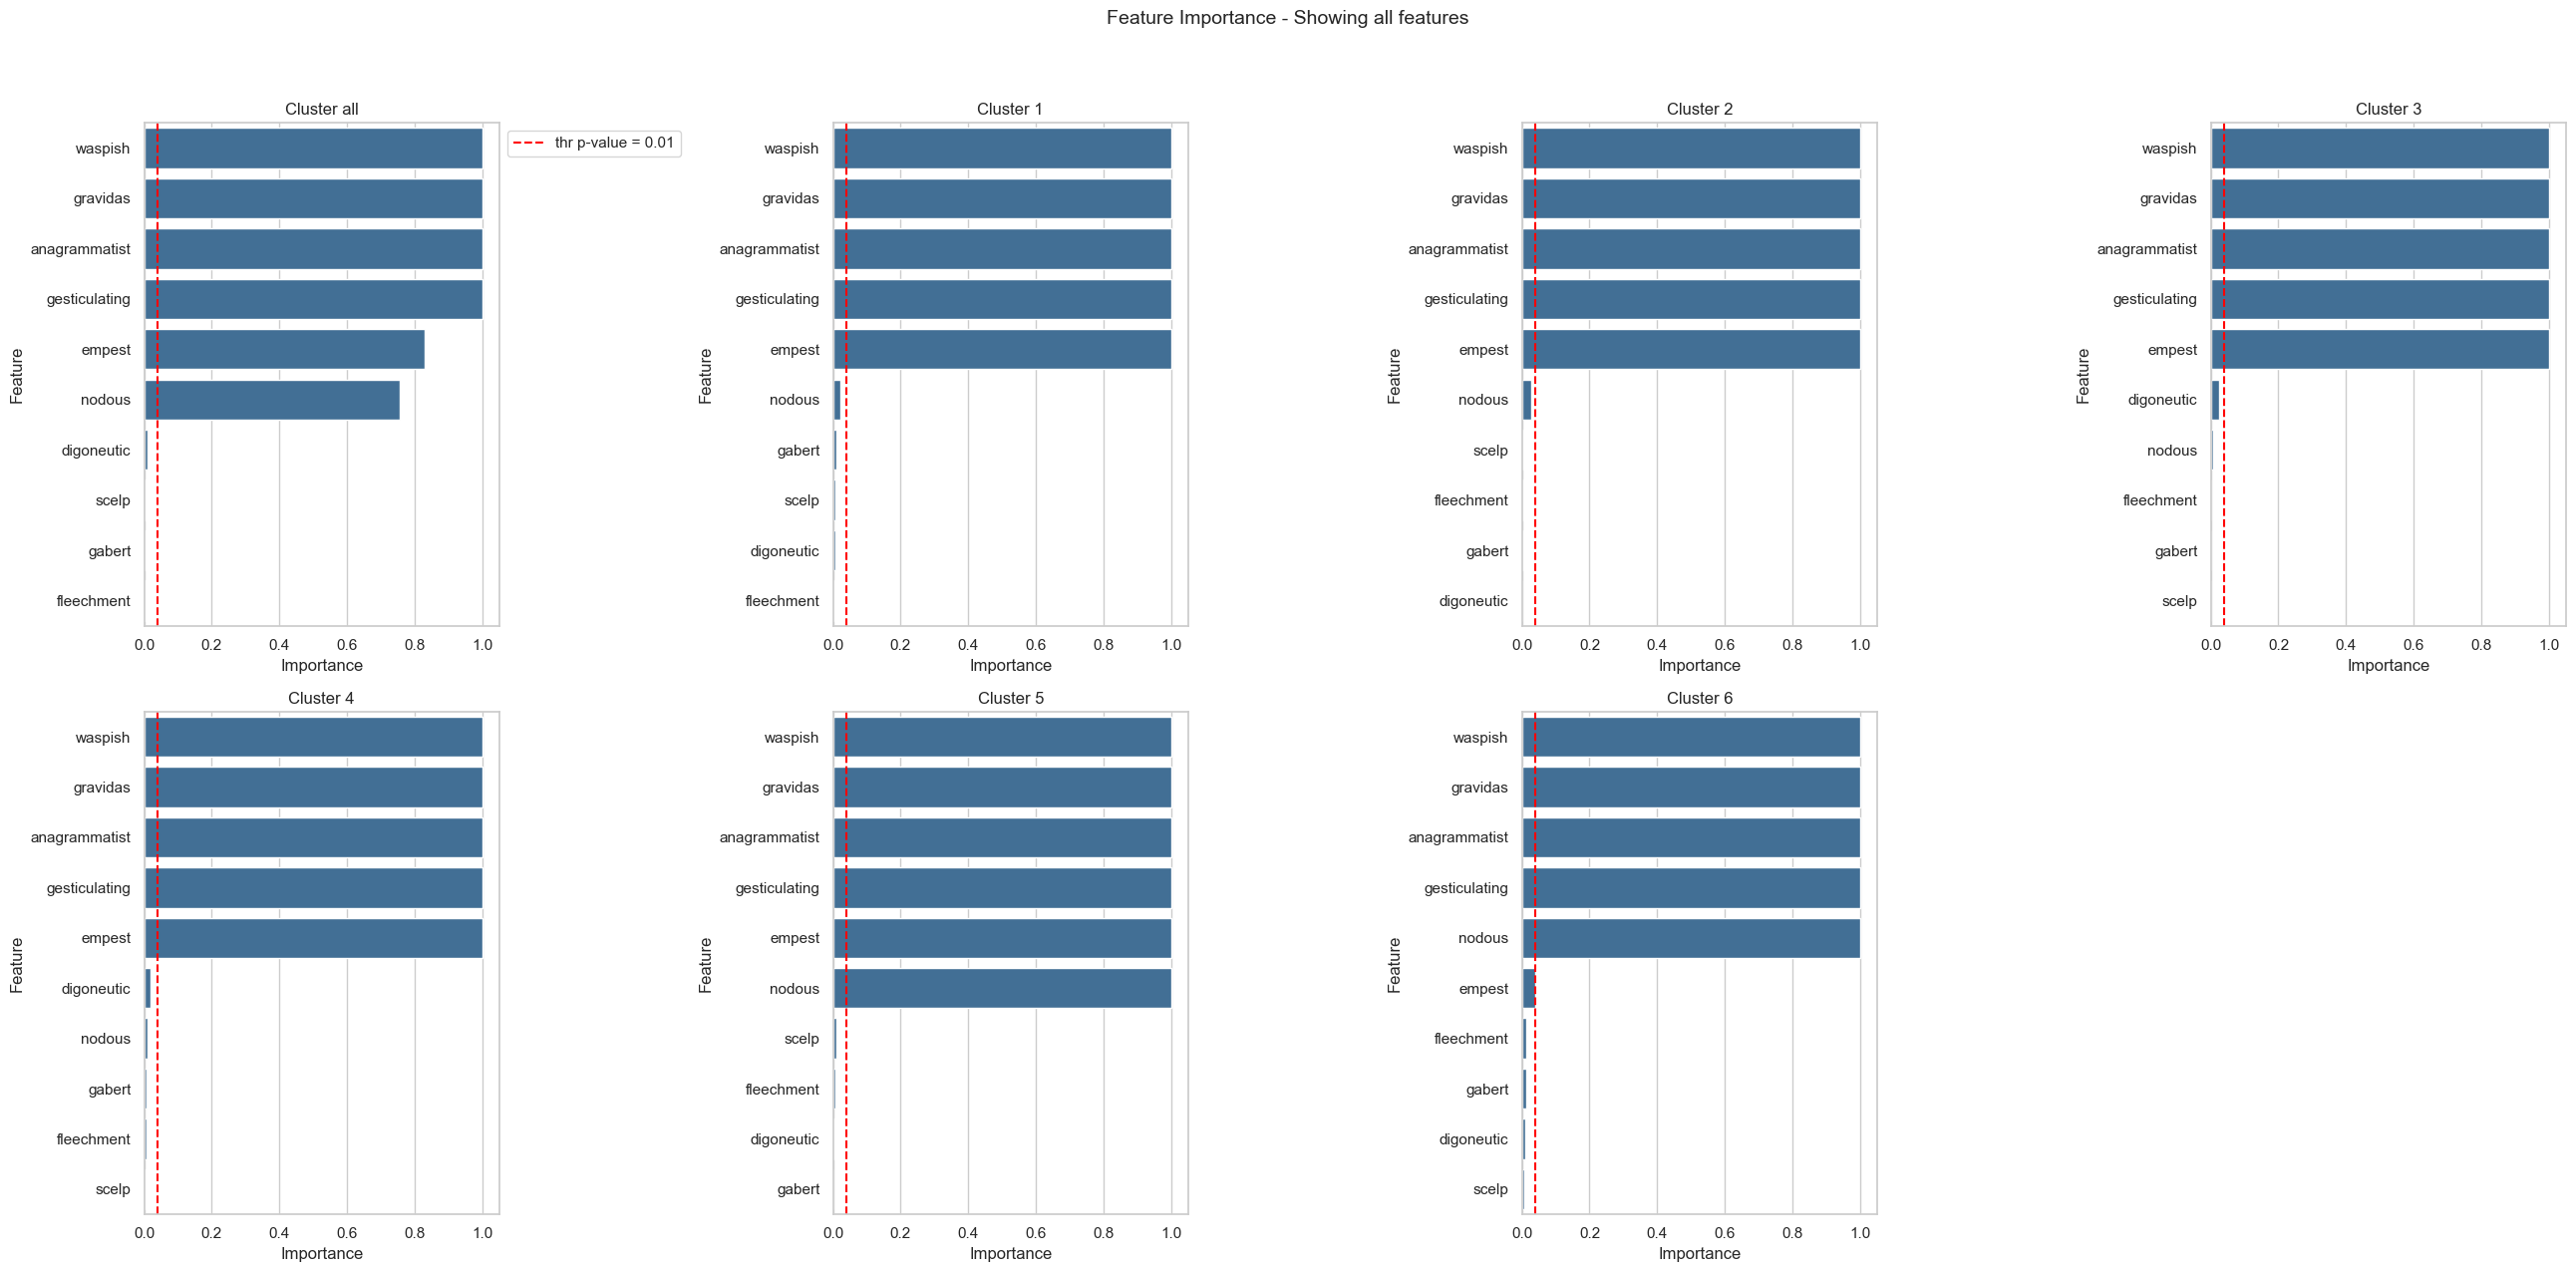

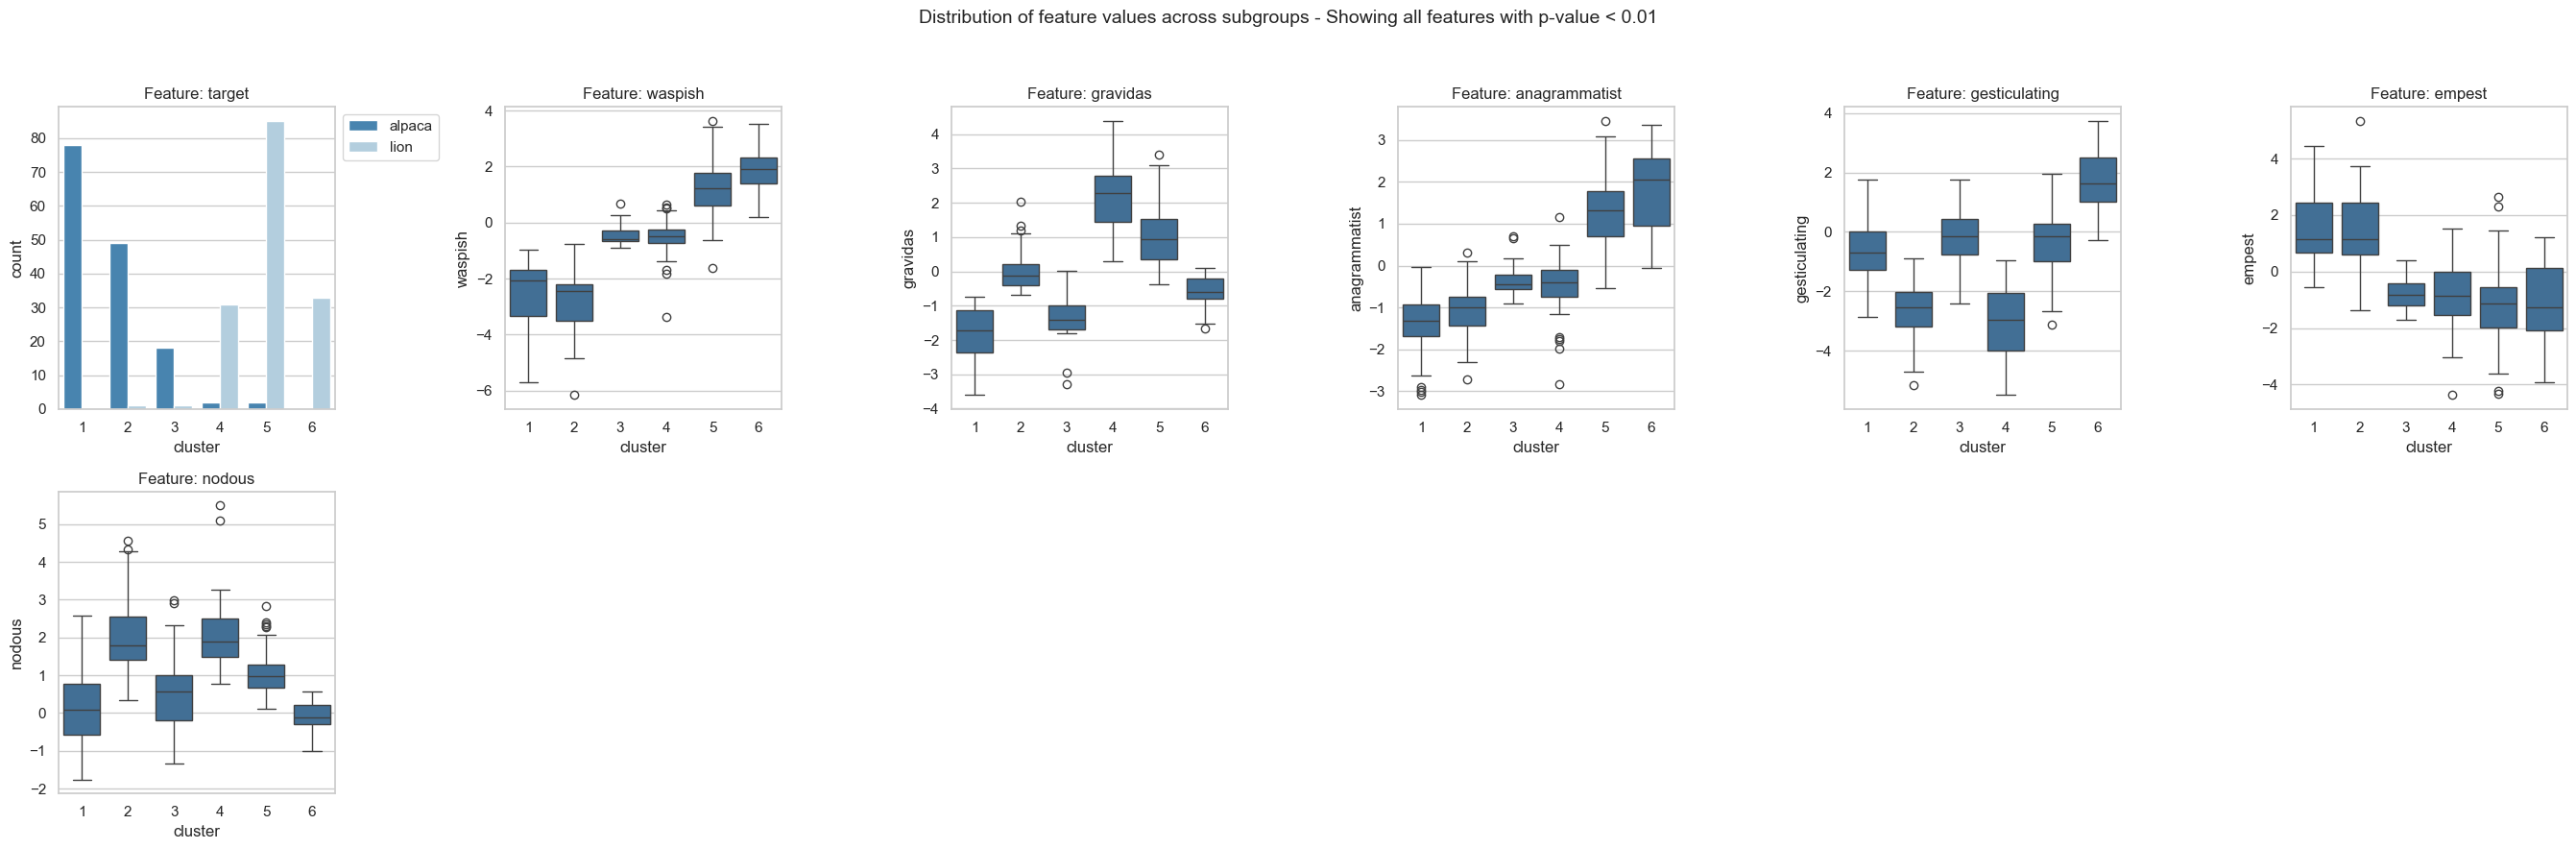

/Users/lisa.barros/Desktop/fg-clustering/fgclustering/plotting.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_heatmap = pd.concat(


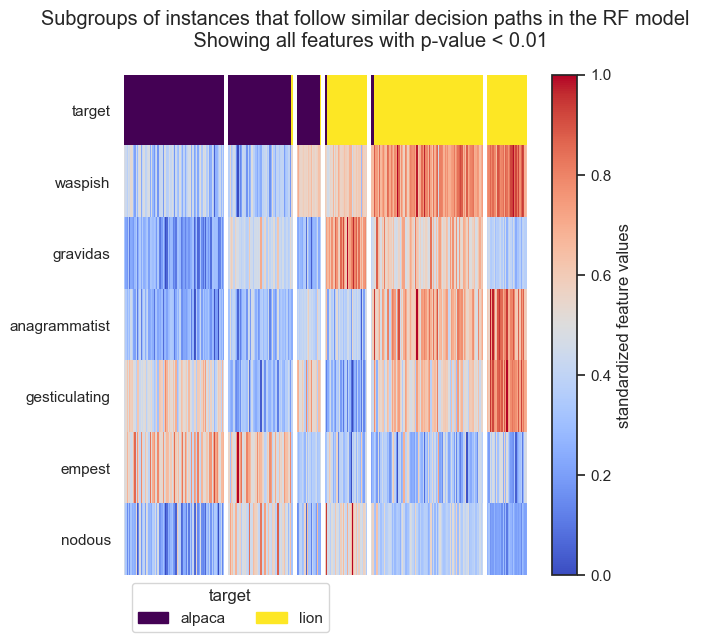

In [22]:
fgc.plot_feature_importance(thr_pvalue=0.01)
fgc.plot_decision_paths(thr_pvalue=0.01)

### Regression

In [23]:
# make regression dataset
X, y = make_regression(n_samples=500, n_features=n_features, n_informative=4, n_targets=1, noise=0, random_state=1)

data_regression = pd.DataFrame(X, columns=feature_names)
data_regression['target'] = y

data_regression.head()

,gesticulating,waspish,gravidas,nodous,scelp,empest,digoneutic,fleechment,anagrammatist,gabert,target
0,-1.778695,0.395753,2.478005,-0.592073,0.049659,-0.551342,1.991515,2.003272,0.148823,1.299629,181.866753
1,0.835058,-0.363053,-0.642874,-0.271229,1.862913,1.168926,1.301225,-1.432067,-0.166020,-0.312392,99.326051
2,-0.110542,2.254777,2.275658,-0.286328,0.489334,1.241964,-0.391446,-0.611964,-0.330991,0.012356,-25.780116
3,0.491127,-0.073353,0.830995,-0.110646,-2.571591,-1.724434,-0.663857,-0.689214,-1.808305,-1.256026,-111.169433
4,-0.518151,-1.544309,0.800851,1.063674,0.230403,-0.289112,-2.086995,0.109807,-1.195191,0.076646,-139.801181


In [24]:
X_regression = data_regression.loc[:, data_regression.columns != 'target']
y_regression = data_regression.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestRegressor(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_regression, y_regression)
rf_regression = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB R^2 of prediction model:')
print(rf_regression.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB R^2 of prediction model:
0.831229511369201


In [25]:
fgc = FgClustering(model=rf_regression, data=data_regression, target_column='target')
fgc.run(n_jobs=3, discart_value_JI=0.7)

Interpreting RandomForestRegressor


 17%|█▋        | 1/6 [00:00<00:02,  1.73it/s]

For number of cluster 2 the Jaccard Index is 0.9357629240822678
For number of cluster 2 the score is 1440679.2941390267


 33%|███▎      | 2/6 [00:01<00:02,  1.46it/s]

For number of cluster 3 the Jaccard Index is 0.6553480346166259
Clustering is instable, no score computed!


 50%|█████     | 3/6 [00:02<00:02,  1.23it/s]

For number of cluster 4 the Jaccard Index is 0.4122355590301153
Clustering is instable, no score computed!


 67%|██████▋   | 4/6 [00:03<00:01,  1.01it/s]

For number of cluster 5 the Jaccard Index is 0.495354031189642
Clustering is instable, no score computed!


 83%|████████▎ | 5/6 [00:05<00:01,  1.36s/it]

For number of cluster 6 the Jaccard Index is 0.46803121504485967
Clustering is instable, no score computed!


100%|██████████| 6/6 [00:08<00:00,  1.36s/it]

For number of cluster 7 the Jaccard Index is 0.4294626707917443
Clustering is instable, no score computed!
Optimal number of cluster is: 2


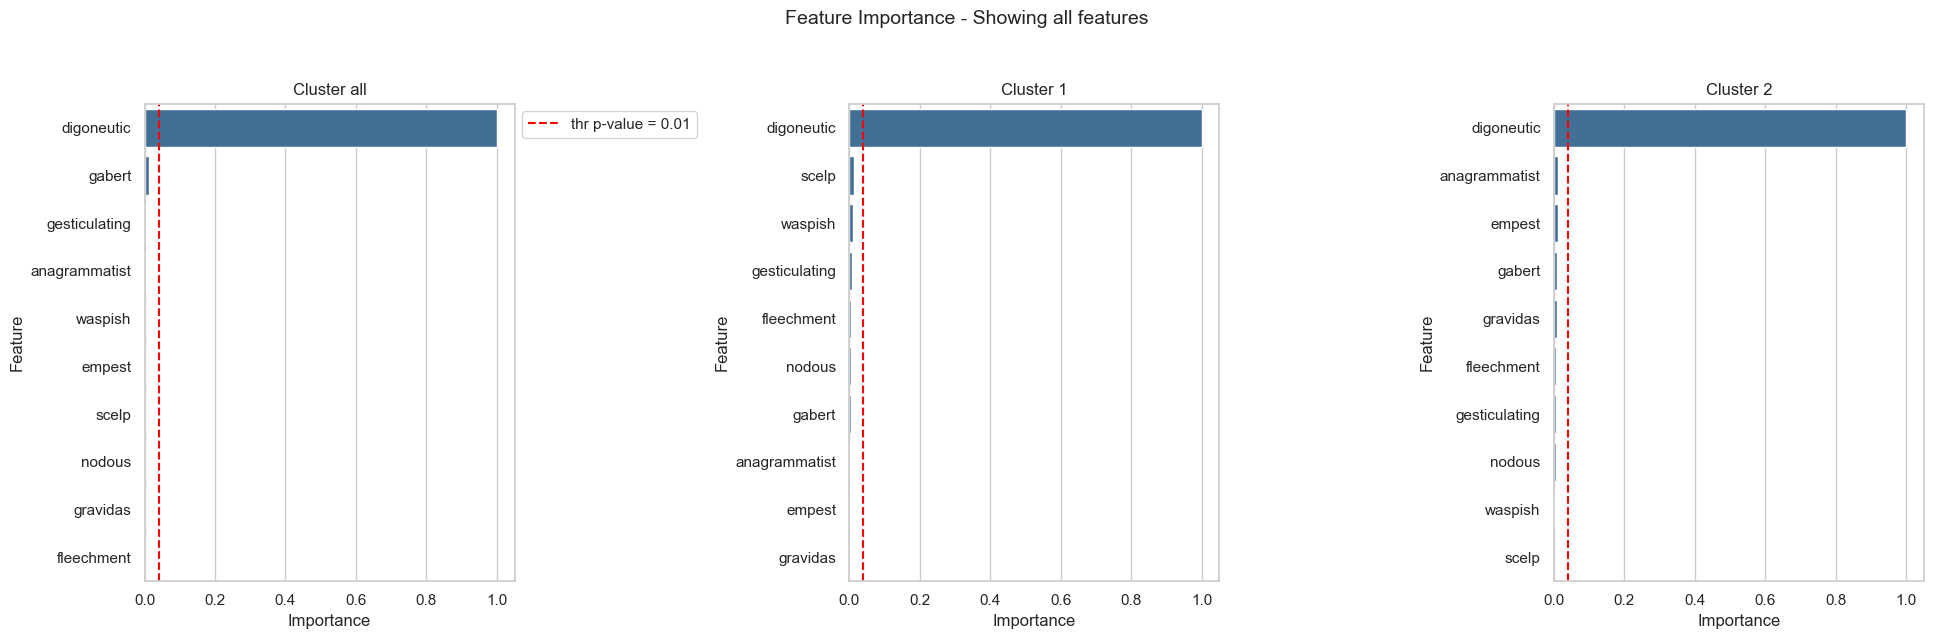

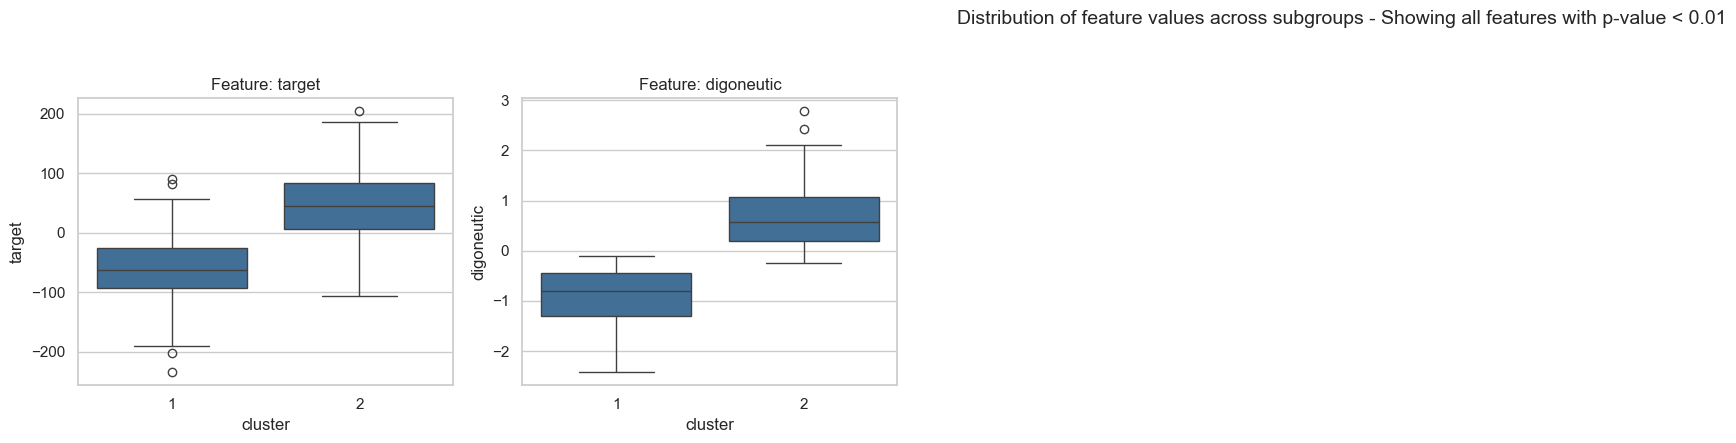

/Users/lisa.barros/Desktop/fg-clustering/fgclustering/plotting.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_heatmap = pd.concat(


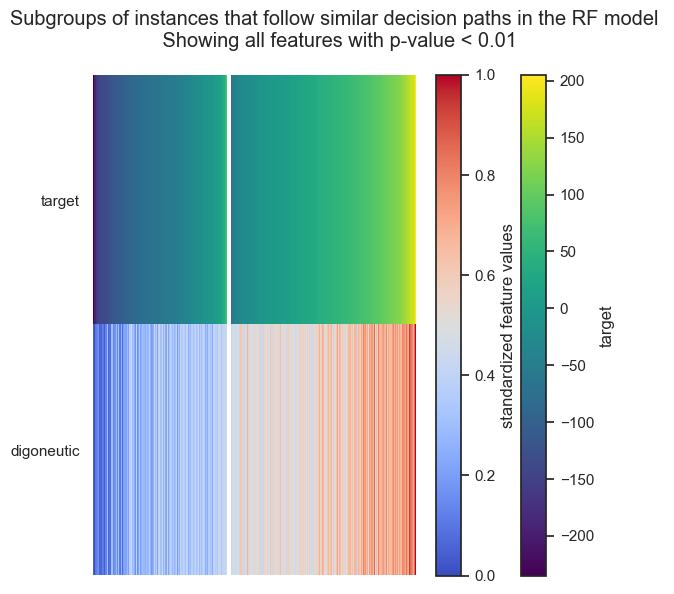

In [26]:
fgc.plot_feature_importance(thr_pvalue=0.01)
fgc.plot_decision_paths(thr_pvalue=0.01)